In [2]:
#Import the packages
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn.svm import SVC , NuSVC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics  
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot as plt
import os 
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import cross_val_score
import pylab as pl
import pandas as pd
from sklearn.utils.multiclass import unique_labels

## LOAD THE DATASETS
8330 samples and 7 features.

In [21]:
def load_dataset():
    load = sio.loadmat('features(10)_cwt')
    features = np.array(load['features'])
    #print(features.shape)
    load = sio.loadmat('SC4001E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = b[800:1633,1]
    load = sio.loadmat('SC4011E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4012E0-PSG_hyp.mat') 
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4021E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4022E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4031E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4032E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4041E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4042E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4051E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    #print(max(labels))
    labels = np.where(labels==4,3,labels)
    labels = np.where(labels==6,0,labels)
    labels = np.where(labels==5,4,labels)
    #print(len(np.where(labels==1)[0]))
    #print(max(labels))
    feat = features[800:1633,:]
    #print(feat.shape)
    for i in range (1,10):
        feat =  np.append(features[800+i*1633:1633+i*1633,:],feat,axis=0) 
    #print(feat.shape)
    return feat, labels

## PERCEPTRON ALGORITHM
The algorithm failed to converge (tol=1e-3) even after 50,000 iterations (max_iter=10,000 given below for quick runtime but it was tested for max_iter=50000). Convergence is based on the Avg. Loss between sucessive iterations being lower than tolerance. The data set may not be linearly separable and will require kernels in the SVM

In [7]:
feat, labels = load_dataset()
scaler = StandardScaler()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
perceptron =linear_model.Perceptron(penalty='l2',max_iter=10000,verbose=2)
perceptron.fit(x_train,y_train)

(16330, 7)
6
(8330, 7)
-- Epoch 1
Norm: 5.38, NNZs: 7, Bias: -5.000000, T: 7497, Avg. loss: 1.264573
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.09, NNZs: 7, Bias: -7.000000, T: 14994, Avg. loss: 1.265807
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.24, NNZs: 7, Bias: -3.000000, T: 22491, Avg. loss: 1.271815
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.66, NNZs: 7, Bias: -2.000000, T: 29988, Avg. loss: 1.308321
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.62, NNZs: 7, Bias: -6.000000, T: 37485, Avg. loss: 1.231258
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.64, NNZs: 7, Bias: -4.000000, T: 44982, Avg. loss: 1.292754
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.17, NNZs: 7, Bias: -5.000000, T: 52479, Avg. loss: 1.282312
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.61, NNZs: 7, Bias: -4.000000, T: 59976, Avg. loss: 1.269889
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.19, NNZs: 7, Bias: -6.000000, T: 67473, Avg. lo

c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Norm: 5.81, NNZs: 7, Bias: -5.000000, T: 3441123, Avg. loss: 1.253069
Total training time: 0.18 seconds.
-- Epoch 460
Norm: 6.54, NNZs: 7, Bias: -7.000000, T: 3448620, Avg. loss: 1.285019
Total training time: 0.18 seconds.
-- Epoch 461
Norm: 5.19, NNZs: 7, Bias: -6.000000, T: 3456117, Avg. loss: 1.268678
Total training time: 0.18 seconds.
-- Epoch 462
Norm: 3.05, NNZs: 7, Bias: -7.000000, T: 3463614, Avg. loss: 1.297720
Total training time: 0.18 seconds.
-- Epoch 463
Norm: 7.26, NNZs: 7, Bias: -4.000000, T: 3471111, Avg. loss: 1.288702
Total training time: 0.18 seconds.
-- Epoch 464
Norm: 6.70, NNZs: 7, Bias: -5.000000, T: 3478608, Avg. loss: 1.259028
Total training time: 0.18 seconds.
-- Epoch 465
Norm: 6.28, NNZs: 7, Bias: -2.000000, T: 3486105, Avg. loss: 1.309263
Total training time: 0.18 seconds.
-- Epoch 466
Norm: 6.41, NNZs: 7, Bias: -6.000000, T: 3493602, Avg. loss: 1.293212
Total training time: 0.18 seconds.
-- Epoch 467
Norm: 3.12, NNZs: 7, Bias: 0.000000, T: 3501099, Avg. lo

Norm: 8.31, NNZs: 7, Bias: -2.000000, T: 7077168, Avg. loss: 1.268565
Total training time: 0.36 seconds.
-- Epoch 945
Norm: 7.63, NNZs: 7, Bias: -4.000000, T: 7084665, Avg. loss: 1.251590
Total training time: 0.36 seconds.
-- Epoch 946
Norm: 4.94, NNZs: 7, Bias: -3.000000, T: 7092162, Avg. loss: 1.318366
Total training time: 0.37 seconds.
-- Epoch 947
Norm: 3.26, NNZs: 7, Bias: -4.000000, T: 7099659, Avg. loss: 1.245660
Total training time: 0.37 seconds.
-- Epoch 948
Norm: 6.41, NNZs: 7, Bias: -3.000000, T: 7107156, Avg. loss: 1.276918
Total training time: 0.37 seconds.
-- Epoch 949
Norm: 5.83, NNZs: 7, Bias: -5.000000, T: 7114653, Avg. loss: 1.314763
Total training time: 0.37 seconds.
-- Epoch 950
Norm: 3.91, NNZs: 7, Bias: -3.000000, T: 7122150, Avg. loss: 1.286839
Total training time: 0.37 seconds.
-- Epoch 951
Norm: 5.98, NNZs: 7, Bias: -4.000000, T: 7129647, Avg. loss: 1.273037
Total training time: 0.37 seconds.
-- Epoch 952
Norm: 5.60, NNZs: 7, Bias: -2.000000, T: 7137144, Avg. l

Norm: 3.87, NNZs: 7, Bias: -3.000000, T: 10833165, Avg. loss: 1.296028
Total training time: 0.55 seconds.
-- Epoch 1446
Norm: 4.14, NNZs: 7, Bias: -5.000000, T: 10840662, Avg. loss: 1.313758
Total training time: 0.55 seconds.
-- Epoch 1447
Norm: 6.05, NNZs: 7, Bias: -6.000000, T: 10848159, Avg. loss: 1.308939
Total training time: 0.55 seconds.
-- Epoch 1448
Norm: 8.56, NNZs: 7, Bias: -2.000000, T: 10855656, Avg. loss: 1.277741
Total training time: 0.55 seconds.
-- Epoch 1449
Norm: 7.07, NNZs: 7, Bias: -5.000000, T: 10863153, Avg. loss: 1.314573
Total training time: 0.55 seconds.
-- Epoch 1450
Norm: 5.58, NNZs: 7, Bias: -4.000000, T: 10870650, Avg. loss: 1.287432
Total training time: 0.55 seconds.
-- Epoch 1451
Norm: 7.61, NNZs: 7, Bias: -5.000000, T: 10878147, Avg. loss: 1.261868
Total training time: 0.55 seconds.
-- Epoch 1452
Norm: 4.55, NNZs: 7, Bias: -1.000000, T: 10885644, Avg. loss: 1.226427
Total training time: 0.56 seconds.
-- Epoch 1453
Norm: 6.17, NNZs: 7, Bias: -4.000000, T:

Norm: 7.52, NNZs: 7, Bias: 0.000000, T: 14416731, Avg. loss: 1.258165
Total training time: 0.74 seconds.
-- Epoch 1924
Norm: 4.69, NNZs: 7, Bias: -4.000000, T: 14424228, Avg. loss: 1.325284
Total training time: 0.74 seconds.
-- Epoch 1925
Norm: 6.30, NNZs: 7, Bias: -5.000000, T: 14431725, Avg. loss: 1.250573
Total training time: 0.74 seconds.
-- Epoch 1926
Norm: 3.76, NNZs: 7, Bias: -3.000000, T: 14439222, Avg. loss: 1.288851
Total training time: 0.74 seconds.
-- Epoch 1927
Norm: 7.68, NNZs: 7, Bias: -5.000000, T: 14446719, Avg. loss: 1.259265
Total training time: 0.74 seconds.
-- Epoch 1928
Norm: 5.26, NNZs: 7, Bias: -3.000000, T: 14454216, Avg. loss: 1.295772
Total training time: 0.74 seconds.
-- Epoch 1929
Norm: 5.53, NNZs: 7, Bias: -3.000000, T: 14461713, Avg. loss: 1.255549
Total training time: 0.74 seconds.
-- Epoch 1930
Norm: 8.42, NNZs: 7, Bias: -4.000000, T: 14469210, Avg. loss: 1.265867
Total training time: 0.74 seconds.
-- Epoch 1931
Norm: 5.19, NNZs: 7, Bias: -3.000000, T: 

Norm: 6.67, NNZs: 7, Bias: -5.000000, T: 17827866, Avg. loss: 1.263292
Total training time: 0.93 seconds.
-- Epoch 2379
Norm: 5.78, NNZs: 7, Bias: -6.000000, T: 17835363, Avg. loss: 1.272564
Total training time: 0.93 seconds.
-- Epoch 2380
Norm: 4.59, NNZs: 7, Bias: -6.000000, T: 17842860, Avg. loss: 1.294163
Total training time: 0.93 seconds.
-- Epoch 2381
Norm: 4.32, NNZs: 7, Bias: -7.000000, T: 17850357, Avg. loss: 1.254187
Total training time: 0.93 seconds.
-- Epoch 2382
Norm: 4.76, NNZs: 7, Bias: -5.000000, T: 17857854, Avg. loss: 1.278713
Total training time: 0.93 seconds.
-- Epoch 2383
Norm: 7.45, NNZs: 7, Bias: -7.000000, T: 17865351, Avg. loss: 1.282444
Total training time: 0.93 seconds.
-- Epoch 2384
Norm: 4.51, NNZs: 7, Bias: -3.000000, T: 17872848, Avg. loss: 1.277872
Total training time: 0.93 seconds.
-- Epoch 2385
Norm: 5.41, NNZs: 7, Bias: -4.000000, T: 17880345, Avg. loss: 1.278842
Total training time: 0.93 seconds.
-- Epoch 2386
Norm: 7.82, NNZs: 7, Bias: -1.000000, T:

Norm: 7.38, NNZs: 7, Bias: -7.000000, T: 21598857, Avg. loss: 1.276341
Total training time: 1.12 seconds.
-- Epoch 2882
Norm: 6.67, NNZs: 7, Bias: -5.000000, T: 21606354, Avg. loss: 1.277528
Total training time: 1.12 seconds.
-- Epoch 2883
Norm: 3.73, NNZs: 7, Bias: -3.000000, T: 21613851, Avg. loss: 1.308691
Total training time: 1.12 seconds.
-- Epoch 2884
Norm: 8.86, NNZs: 7, Bias: -2.000000, T: 21621348, Avg. loss: 1.251415
Total training time: 1.12 seconds.
-- Epoch 2885
Norm: 3.81, NNZs: 7, Bias: -4.000000, T: 21628845, Avg. loss: 1.284397
Total training time: 1.12 seconds.
-- Epoch 2886
Norm: 5.54, NNZs: 7, Bias: -6.000000, T: 21636342, Avg. loss: 1.255061
Total training time: 1.12 seconds.
-- Epoch 2887
Norm: 7.88, NNZs: 7, Bias: -6.000000, T: 21643839, Avg. loss: 1.269447
Total training time: 1.12 seconds.
-- Epoch 2888
Norm: 5.16, NNZs: 7, Bias: -4.000000, T: 21651336, Avg. loss: 1.254709
Total training time: 1.12 seconds.
-- Epoch 2889
Norm: 10.35, NNZs: 7, Bias: -3.000000, T

Norm: 3.34, NNZs: 7, Bias: -4.000000, T: 25272387, Avg. loss: 1.293698
Total training time: 1.30 seconds.
-- Epoch 3372
Norm: 7.48, NNZs: 7, Bias: -4.000000, T: 25279884, Avg. loss: 1.277715
Total training time: 1.30 seconds.
-- Epoch 3373
Norm: 5.39, NNZs: 7, Bias: -3.000000, T: 25287381, Avg. loss: 1.259182
Total training time: 1.30 seconds.
-- Epoch 3374
Norm: 5.21, NNZs: 7, Bias: -5.000000, T: 25294878, Avg. loss: 1.287179
Total training time: 1.30 seconds.
-- Epoch 3375
Norm: 5.31, NNZs: 7, Bias: -5.000000, T: 25302375, Avg. loss: 1.249102
Total training time: 1.31 seconds.
-- Epoch 3376
Norm: 5.02, NNZs: 7, Bias: -3.000000, T: 25309872, Avg. loss: 1.300210
Total training time: 1.31 seconds.
-- Epoch 3377
Norm: 5.87, NNZs: 7, Bias: -7.000000, T: 25317369, Avg. loss: 1.294376
Total training time: 1.31 seconds.
-- Epoch 3378
Norm: 5.33, NNZs: 7, Bias: -4.000000, T: 25324866, Avg. loss: 1.295570
Total training time: 1.31 seconds.
-- Epoch 3379
Norm: 7.26, NNZs: 7, Bias: -1.000000, T:

Norm: 5.62, NNZs: 7, Bias: -3.000000, T: 28953414, Avg. loss: 1.303426
Total training time: 1.49 seconds.
-- Epoch 3863
Norm: 2.96, NNZs: 7, Bias: -4.000000, T: 28960911, Avg. loss: 1.292346
Total training time: 1.49 seconds.
-- Epoch 3864
Norm: 6.16, NNZs: 7, Bias: -4.000000, T: 28968408, Avg. loss: 1.251206
Total training time: 1.49 seconds.
-- Epoch 3865
Norm: 4.91, NNZs: 7, Bias: -3.000000, T: 28975905, Avg. loss: 1.274891
Total training time: 1.49 seconds.
-- Epoch 3866
Norm: 3.90, NNZs: 7, Bias: -1.000000, T: 28983402, Avg. loss: 1.282776
Total training time: 1.49 seconds.
-- Epoch 3867
Norm: 5.58, NNZs: 7, Bias: -2.000000, T: 28990899, Avg. loss: 1.246829
Total training time: 1.49 seconds.
-- Epoch 3868
Norm: 5.36, NNZs: 7, Bias: -3.000000, T: 28998396, Avg. loss: 1.279746
Total training time: 1.49 seconds.
-- Epoch 3869
Norm: 7.90, NNZs: 7, Bias: -5.000000, T: 29005893, Avg. loss: 1.305705
Total training time: 1.49 seconds.
-- Epoch 3870
Norm: 4.62, NNZs: 7, Bias: 0.000000, T: 

Norm: 6.57, NNZs: 7, Bias: -2.000000, T: 32649435, Avg. loss: 1.244982
Total training time: 1.68 seconds.
-- Epoch 4356
Norm: 6.53, NNZs: 7, Bias: -3.000000, T: 32656932, Avg. loss: 1.278816
Total training time: 1.68 seconds.
-- Epoch 4357
Norm: 6.76, NNZs: 7, Bias: -7.000000, T: 32664429, Avg. loss: 1.245422
Total training time: 1.68 seconds.
-- Epoch 4358
Norm: 5.34, NNZs: 7, Bias: -7.000000, T: 32671926, Avg. loss: 1.265752
Total training time: 1.68 seconds.
-- Epoch 4359
Norm: 5.58, NNZs: 7, Bias: -6.000000, T: 32679423, Avg. loss: 1.264031
Total training time: 1.68 seconds.
-- Epoch 4360
Norm: 6.06, NNZs: 7, Bias: -7.000000, T: 32686920, Avg. loss: 1.237875
Total training time: 1.68 seconds.
-- Epoch 4361
Norm: 4.88, NNZs: 7, Bias: -4.000000, T: 32694417, Avg. loss: 1.277862
Total training time: 1.68 seconds.
-- Epoch 4362
Norm: 5.75, NNZs: 7, Bias: -4.000000, T: 32701914, Avg. loss: 1.249859
Total training time: 1.68 seconds.
-- Epoch 4363
Norm: 5.57, NNZs: 7, Bias: -7.000000, T:

Norm: 5.33, NNZs: 7, Bias: -4.000000, T: 36240498, Avg. loss: 1.268296
Total training time: 1.87 seconds.
-- Epoch 4835
Norm: 7.84, NNZs: 7, Bias: -2.000000, T: 36247995, Avg. loss: 1.276918
Total training time: 1.87 seconds.
-- Epoch 4836
Norm: 5.59, NNZs: 7, Bias: -3.000000, T: 36255492, Avg. loss: 1.288979
Total training time: 1.87 seconds.
-- Epoch 4837
Norm: 7.27, NNZs: 7, Bias: -6.000000, T: 36262989, Avg. loss: 1.259679
Total training time: 1.87 seconds.
-- Epoch 4838
Norm: 6.19, NNZs: 7, Bias: -4.000000, T: 36270486, Avg. loss: 1.261637
Total training time: 1.87 seconds.
-- Epoch 4839
Norm: 6.41, NNZs: 7, Bias: -3.000000, T: 36277983, Avg. loss: 1.232861
Total training time: 1.87 seconds.
-- Epoch 4840
Norm: 5.68, NNZs: 7, Bias: -1.000000, T: 36285480, Avg. loss: 1.290963
Total training time: 1.87 seconds.
-- Epoch 4841
Norm: 3.82, NNZs: 7, Bias: -4.000000, T: 36292977, Avg. loss: 1.271448
Total training time: 1.87 seconds.
-- Epoch 4842
Norm: 3.61, NNZs: 7, Bias: -4.000000, T:

Norm: 5.33, NNZs: 7, Bias: -4.000000, T: 39816567, Avg. loss: 1.306849
Total training time: 2.05 seconds.
-- Epoch 5312
Norm: 6.92, NNZs: 7, Bias: -4.000000, T: 39824064, Avg. loss: 1.320482
Total training time: 2.05 seconds.
-- Epoch 5313
Norm: 7.81, NNZs: 7, Bias: -5.000000, T: 39831561, Avg. loss: 1.263881
Total training time: 2.05 seconds.
-- Epoch 5314
Norm: 3.27, NNZs: 7, Bias: -5.000000, T: 39839058, Avg. loss: 1.310472
Total training time: 2.06 seconds.
-- Epoch 5315
Norm: 6.07, NNZs: 7, Bias: -5.000000, T: 39846555, Avg. loss: 1.276949
Total training time: 2.06 seconds.
-- Epoch 5316
Norm: 5.55, NNZs: 7, Bias: -4.000000, T: 39854052, Avg. loss: 1.243709
Total training time: 2.06 seconds.
-- Epoch 5317
Norm: 6.17, NNZs: 7, Bias: -6.000000, T: 39861549, Avg. loss: 1.279582
Total training time: 2.06 seconds.
-- Epoch 5318
Norm: 5.75, NNZs: 7, Bias: -4.000000, T: 39869046, Avg. loss: 1.293497
Total training time: 2.06 seconds.
-- Epoch 5319
Norm: 6.86, NNZs: 7, Bias: -7.000000, T:

Norm: 5.18, NNZs: 7, Bias: -6.000000, T: 43497594, Avg. loss: 1.285404
Total training time: 2.24 seconds.
-- Epoch 5803
Norm: 9.37, NNZs: 7, Bias: -3.000000, T: 43505091, Avg. loss: 1.272479
Total training time: 2.24 seconds.
-- Epoch 5804
Norm: 4.40, NNZs: 7, Bias: -3.000000, T: 43512588, Avg. loss: 1.284871
Total training time: 2.24 seconds.
-- Epoch 5805
Norm: 2.82, NNZs: 7, Bias: -3.000000, T: 43520085, Avg. loss: 1.255387
Total training time: 2.24 seconds.
-- Epoch 5806
Norm: 5.24, NNZs: 7, Bias: -2.000000, T: 43527582, Avg. loss: 1.293259
Total training time: 2.24 seconds.
-- Epoch 5807
Norm: 3.56, NNZs: 7, Bias: -6.000000, T: 43535079, Avg. loss: 1.276631
Total training time: 2.24 seconds.
-- Epoch 5808
Norm: 7.55, NNZs: 7, Bias: -6.000000, T: 43542576, Avg. loss: 1.275964
Total training time: 2.24 seconds.
-- Epoch 5809
Norm: 4.80, NNZs: 7, Bias: -5.000000, T: 43550073, Avg. loss: 1.296945
Total training time: 2.24 seconds.
-- Epoch 5810
Norm: 3.33, NNZs: 7, Bias: -2.000000, T:

Norm: 3.91, NNZs: 7, Bias: -3.000000, T: 47126142, Avg. loss: 1.267805
Total training time: 2.43 seconds.
-- Epoch 6287
Norm: 5.77, NNZs: 7, Bias: -4.000000, T: 47133639, Avg. loss: 1.275634
Total training time: 2.43 seconds.
-- Epoch 6288
Norm: 4.97, NNZs: 7, Bias: -4.000000, T: 47141136, Avg. loss: 1.268290
Total training time: 2.43 seconds.
-- Epoch 6289
Norm: 3.88, NNZs: 7, Bias: -5.000000, T: 47148633, Avg. loss: 1.281601
Total training time: 2.43 seconds.
-- Epoch 6290
Norm: 5.93, NNZs: 7, Bias: -1.000000, T: 47156130, Avg. loss: 1.229633
Total training time: 2.43 seconds.
-- Epoch 6291
Norm: 7.34, NNZs: 7, Bias: -4.000000, T: 47163627, Avg. loss: 1.291860
Total training time: 2.43 seconds.
-- Epoch 6292
Norm: 6.76, NNZs: 7, Bias: -6.000000, T: 47171124, Avg. loss: 1.255302
Total training time: 2.43 seconds.
-- Epoch 6293
Norm: 8.06, NNZs: 7, Bias: -4.000000, T: 47178621, Avg. loss: 1.252959
Total training time: 2.43 seconds.
-- Epoch 6294
Norm: 5.66, NNZs: 7, Bias: -6.000000, T:

Norm: 4.66, NNZs: 7, Bias: -2.000000, T: 50837157, Avg. loss: 1.236863
Total training time: 2.62 seconds.
-- Epoch 6782
Norm: 4.02, NNZs: 7, Bias: -1.000000, T: 50844654, Avg. loss: 1.285065
Total training time: 2.62 seconds.
-- Epoch 6783
Norm: 6.24, NNZs: 7, Bias: -5.000000, T: 50852151, Avg. loss: 1.308764
Total training time: 2.62 seconds.
-- Epoch 6784
Norm: 6.69, NNZs: 7, Bias: -5.000000, T: 50859648, Avg. loss: 1.286751
Total training time: 2.62 seconds.
-- Epoch 6785
Norm: 5.37, NNZs: 7, Bias: -5.000000, T: 50867145, Avg. loss: 1.291969
Total training time: 2.62 seconds.
-- Epoch 6786
Norm: 9.17, NNZs: 7, Bias: -4.000000, T: 50874642, Avg. loss: 1.297028
Total training time: 2.62 seconds.
-- Epoch 6787
Norm: 7.69, NNZs: 7, Bias: -5.000000, T: 50882139, Avg. loss: 1.265165
Total training time: 2.62 seconds.
-- Epoch 6788
Norm: 6.22, NNZs: 7, Bias: -3.000000, T: 50889636, Avg. loss: 1.295942
Total training time: 2.62 seconds.
-- Epoch 6789
Norm: 4.69, NNZs: 7, Bias: -6.000000, T:

Norm: 6.47, NNZs: 7, Bias: -3.000000, T: 54495693, Avg. loss: 1.276362
Total training time: 2.80 seconds.
-- Epoch 7270
Norm: 5.93, NNZs: 7, Bias: -4.000000, T: 54503190, Avg. loss: 1.254598
Total training time: 2.80 seconds.
-- Epoch 7271
Norm: 6.09, NNZs: 7, Bias: -3.000000, T: 54510687, Avg. loss: 1.287058
Total training time: 2.80 seconds.
-- Epoch 7272
Norm: 6.45, NNZs: 7, Bias: -3.000000, T: 54518184, Avg. loss: 1.298884
Total training time: 2.80 seconds.
-- Epoch 7273
Norm: 7.76, NNZs: 7, Bias: -1.000000, T: 54525681, Avg. loss: 1.306884
Total training time: 2.81 seconds.
-- Epoch 7274
Norm: 7.66, NNZs: 7, Bias: -2.000000, T: 54533178, Avg. loss: 1.275745
Total training time: 2.81 seconds.
-- Epoch 7275
Norm: 4.67, NNZs: 7, Bias: -5.000000, T: 54540675, Avg. loss: 1.276773
Total training time: 2.81 seconds.
-- Epoch 7276
Norm: 5.98, NNZs: 7, Bias: -3.000000, T: 54548172, Avg. loss: 1.266235
Total training time: 2.81 seconds.
-- Epoch 7277
Norm: 8.20, NNZs: 7, Bias: 0.000000, T: 

Norm: 5.38, NNZs: 7, Bias: -3.000000, T: 58214205, Avg. loss: 1.227209
Total training time: 2.99 seconds.
-- Epoch 7766
Norm: 3.69, NNZs: 7, Bias: -4.000000, T: 58221702, Avg. loss: 1.249981
Total training time: 2.99 seconds.
-- Epoch 7767
Norm: 7.12, NNZs: 7, Bias: -1.000000, T: 58229199, Avg. loss: 1.303287
Total training time: 2.99 seconds.
-- Epoch 7768
Norm: 4.49, NNZs: 7, Bias: -7.000000, T: 58236696, Avg. loss: 1.298475
Total training time: 2.99 seconds.
-- Epoch 7769
Norm: 5.21, NNZs: 7, Bias: -6.000000, T: 58244193, Avg. loss: 1.276475
Total training time: 2.99 seconds.
-- Epoch 7770
Norm: 5.18, NNZs: 7, Bias: -4.000000, T: 58251690, Avg. loss: 1.267610
Total training time: 2.99 seconds.
-- Epoch 7771
Norm: 6.70, NNZs: 7, Bias: -3.000000, T: 58259187, Avg. loss: 1.272311
Total training time: 2.99 seconds.
-- Epoch 7772
Norm: 5.69, NNZs: 7, Bias: -2.000000, T: 58266684, Avg. loss: 1.264564
Total training time: 2.99 seconds.
-- Epoch 7773
Norm: 4.55, NNZs: 7, Bias: -4.000000, T:

Norm: 4.83, NNZs: 7, Bias: -5.000000, T: 62022681, Avg. loss: 1.287176
Total training time: 3.18 seconds.
-- Epoch 8274
Norm: 6.73, NNZs: 7, Bias: -5.000000, T: 62030178, Avg. loss: 1.274418
Total training time: 3.18 seconds.
-- Epoch 8275
Norm: 5.60, NNZs: 7, Bias: -3.000000, T: 62037675, Avg. loss: 1.296383
Total training time: 3.18 seconds.
-- Epoch 8276
Norm: 7.81, NNZs: 7, Bias: -2.000000, T: 62045172, Avg. loss: 1.318063
Total training time: 3.18 seconds.
-- Epoch 8277
Norm: 4.89, NNZs: 7, Bias: -6.000000, T: 62052669, Avg. loss: 1.301919
Total training time: 3.18 seconds.
-- Epoch 8278
Norm: 5.02, NNZs: 7, Bias: -2.000000, T: 62060166, Avg. loss: 1.233986
Total training time: 3.18 seconds.
-- Epoch 8279
Norm: 6.50, NNZs: 7, Bias: -5.000000, T: 62067663, Avg. loss: 1.271158
Total training time: 3.18 seconds.
-- Epoch 8280
Norm: 6.80, NNZs: 7, Bias: -3.000000, T: 62075160, Avg. loss: 1.277296
Total training time: 3.18 seconds.
-- Epoch 8281
Norm: 4.91, NNZs: 7, Bias: -4.000000, T:

Norm: 5.02, NNZs: 7, Bias: -4.000000, T: 65366343, Avg. loss: 1.233381
Total training time: 3.37 seconds.
-- Epoch 8720
Norm: 4.50, NNZs: 7, Bias: -5.000000, T: 65373840, Avg. loss: 1.263423
Total training time: 3.37 seconds.
-- Epoch 8721
Norm: 6.18, NNZs: 7, Bias: -6.000000, T: 65381337, Avg. loss: 1.262720
Total training time: 3.37 seconds.
-- Epoch 8722
Norm: 7.77, NNZs: 7, Bias: -1.000000, T: 65388834, Avg. loss: 1.324398
Total training time: 3.37 seconds.
-- Epoch 8723
Norm: 5.67, NNZs: 7, Bias: 0.000000, T: 65396331, Avg. loss: 1.236147
Total training time: 3.37 seconds.
-- Epoch 8724
Norm: 6.63, NNZs: 7, Bias: -4.000000, T: 65403828, Avg. loss: 1.282139
Total training time: 3.37 seconds.
-- Epoch 8725
Norm: 5.40, NNZs: 7, Bias: -1.000000, T: 65411325, Avg. loss: 1.293084
Total training time: 3.37 seconds.
-- Epoch 8726
Norm: 5.87, NNZs: 7, Bias: -4.000000, T: 65418822, Avg. loss: 1.251873
Total training time: 3.37 seconds.
-- Epoch 8727
Norm: 5.76, NNZs: 7, Bias: -3.000000, T: 

Norm: 3.27, NNZs: 7, Bias: -3.000000, T: 69017382, Avg. loss: 1.274528
Total training time: 3.55 seconds.
-- Epoch 9207
Norm: 5.04, NNZs: 7, Bias: -3.000000, T: 69024879, Avg. loss: 1.252837
Total training time: 3.55 seconds.
-- Epoch 9208
Norm: 6.80, NNZs: 7, Bias: -6.000000, T: 69032376, Avg. loss: 1.242084
Total training time: 3.55 seconds.
-- Epoch 9209
Norm: 4.95, NNZs: 7, Bias: -3.000000, T: 69039873, Avg. loss: 1.260281
Total training time: 3.55 seconds.
-- Epoch 9210
Norm: 6.61, NNZs: 7, Bias: -2.000000, T: 69047370, Avg. loss: 1.275581
Total training time: 3.55 seconds.
-- Epoch 9211
Norm: 4.35, NNZs: 7, Bias: -4.000000, T: 69054867, Avg. loss: 1.316648
Total training time: 3.55 seconds.
-- Epoch 9212
Norm: 7.04, NNZs: 7, Bias: -6.000000, T: 69062364, Avg. loss: 1.260317
Total training time: 3.55 seconds.
-- Epoch 9213
Norm: 5.46, NNZs: 7, Bias: -4.000000, T: 69069861, Avg. loss: 1.321532
Total training time: 3.56 seconds.
-- Epoch 9214
Norm: 8.25, NNZs: 7, Bias: -3.000000, T:

Norm: 5.62, NNZs: 7, Bias: -5.000000, T: 72540972, Avg. loss: 1.289916
Total training time: 3.74 seconds.
-- Epoch 9677
Norm: 7.90, NNZs: 7, Bias: -5.000000, T: 72548469, Avg. loss: 1.300265
Total training time: 3.74 seconds.
-- Epoch 9678
Norm: 4.26, NNZs: 7, Bias: -2.000000, T: 72555966, Avg. loss: 1.274412
Total training time: 3.74 seconds.
-- Epoch 9679
Norm: 5.21, NNZs: 7, Bias: -5.000000, T: 72563463, Avg. loss: 1.245510
Total training time: 3.74 seconds.
-- Epoch 9680
Norm: 3.60, NNZs: 7, Bias: -5.000000, T: 72570960, Avg. loss: 1.293342
Total training time: 3.74 seconds.
-- Epoch 9681
Norm: 6.45, NNZs: 7, Bias: -7.000000, T: 72578457, Avg. loss: 1.266709
Total training time: 3.74 seconds.
-- Epoch 9682
Norm: 4.83, NNZs: 7, Bias: -2.000000, T: 72585954, Avg. loss: 1.292022
Total training time: 3.74 seconds.
-- Epoch 9683
Norm: 7.22, NNZs: 7, Bias: -4.000000, T: 72593451, Avg. loss: 1.243526
Total training time: 3.74 seconds.
-- Epoch 9684
Norm: 6.65, NNZs: 7, Bias: -4.000000, T:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


Norm: 3.99, NNZs: 7, Bias: -5.000000, T: 1311975, Avg. loss: 0.686416
Total training time: 0.06 seconds.
-- Epoch 176
Norm: 6.24, NNZs: 7, Bias: -6.000000, T: 1319472, Avg. loss: 0.680355
Total training time: 0.06 seconds.
-- Epoch 177
Norm: 3.09, NNZs: 7, Bias: -6.000000, T: 1326969, Avg. loss: 0.675798
Total training time: 0.06 seconds.
-- Epoch 178
Norm: 5.21, NNZs: 7, Bias: -7.000000, T: 1334466, Avg. loss: 0.679408
Total training time: 0.06 seconds.
-- Epoch 179
Norm: 6.09, NNZs: 7, Bias: -5.000000, T: 1341963, Avg. loss: 0.688812
Total training time: 0.06 seconds.
-- Epoch 180
Norm: 9.11, NNZs: 7, Bias: -8.000000, T: 1349460, Avg. loss: 0.684716
Total training time: 0.06 seconds.
-- Epoch 181
Norm: 7.04, NNZs: 7, Bias: -2.000000, T: 1356957, Avg. loss: 0.689568
Total training time: 0.06 seconds.
-- Epoch 182
Norm: 4.30, NNZs: 7, Bias: -5.000000, T: 1364454, Avg. loss: 0.676131
Total training time: 0.06 seconds.
-- Epoch 183
Norm: 6.95, NNZs: 7, Bias: -6.000000, T: 1371951, Avg. l

Norm: 6.29, NNZs: 7, Bias: -3.000000, T: 5285385, Avg. loss: 0.678918
Total training time: 0.25 seconds.
-- Epoch 706
Norm: 5.42, NNZs: 7, Bias: -9.000000, T: 5292882, Avg. loss: 0.693980
Total training time: 0.25 seconds.
-- Epoch 707
Norm: 7.89, NNZs: 7, Bias: -4.000000, T: 5300379, Avg. loss: 0.686861
Total training time: 0.25 seconds.
-- Epoch 708
Norm: 5.08, NNZs: 7, Bias: -7.000000, T: 5307876, Avg. loss: 0.689117
Total training time: 0.25 seconds.
-- Epoch 709
Norm: 6.12, NNZs: 7, Bias: -7.000000, T: 5315373, Avg. loss: 0.663600
Total training time: 0.25 seconds.
-- Epoch 710
Norm: 5.48, NNZs: 7, Bias: -3.000000, T: 5322870, Avg. loss: 0.706371
Total training time: 0.25 seconds.
-- Epoch 711
Norm: 7.62, NNZs: 7, Bias: -9.000000, T: 5330367, Avg. loss: 0.687195
Total training time: 0.25 seconds.
-- Epoch 712
Norm: 5.90, NNZs: 7, Bias: -6.000000, T: 5337864, Avg. loss: 0.681919
Total training time: 0.25 seconds.
-- Epoch 713
Norm: 7.82, NNZs: 7, Bias: -8.000000, T: 5345361, Avg. l

Norm: 6.10, NNZs: 7, Bias: -2.000000, T: 9251298, Avg. loss: 0.698196
Total training time: 0.43 seconds.
-- Epoch 1235
Norm: 4.92, NNZs: 7, Bias: -6.000000, T: 9258795, Avg. loss: 0.679143
Total training time: 0.43 seconds.
-- Epoch 1236
Norm: 6.17, NNZs: 7, Bias: -5.000000, T: 9266292, Avg. loss: 0.687183
Total training time: 0.43 seconds.
-- Epoch 1237
Norm: 3.46, NNZs: 7, Bias: -6.000000, T: 9273789, Avg. loss: 0.693143
Total training time: 0.44 seconds.
-- Epoch 1238
Norm: 4.84, NNZs: 7, Bias: -6.000000, T: 9281286, Avg. loss: 0.684357
Total training time: 0.44 seconds.
-- Epoch 1239
Norm: 4.16, NNZs: 7, Bias: -5.000000, T: 9288783, Avg. loss: 0.684645
Total training time: 0.44 seconds.
-- Epoch 1240
Norm: 5.54, NNZs: 7, Bias: -4.000000, T: 9296280, Avg. loss: 0.678068
Total training time: 0.44 seconds.
-- Epoch 1241
Norm: 6.22, NNZs: 7, Bias: -9.000000, T: 9303777, Avg. loss: 0.700253
Total training time: 0.44 seconds.
-- Epoch 1242
Norm: 5.43, NNZs: 7, Bias: -6.000000, T: 9311274

Norm: 5.19, NNZs: 7, Bias: -5.000000, T: 13187223, Avg. loss: 0.663550
Total training time: 0.62 seconds.
-- Epoch 1760
Norm: 8.15, NNZs: 7, Bias: -8.000000, T: 13194720, Avg. loss: 0.671580
Total training time: 0.62 seconds.
-- Epoch 1761
Norm: 3.12, NNZs: 7, Bias: -9.000000, T: 13202217, Avg. loss: 0.672062
Total training time: 0.62 seconds.
-- Epoch 1762
Norm: 4.37, NNZs: 7, Bias: -4.000000, T: 13209714, Avg. loss: 0.678616
Total training time: 0.62 seconds.
-- Epoch 1763
Norm: 6.15, NNZs: 7, Bias: -4.000000, T: 13217211, Avg. loss: 0.697404
Total training time: 0.62 seconds.
-- Epoch 1764
Norm: 6.22, NNZs: 7, Bias: -5.000000, T: 13224708, Avg. loss: 0.689275
Total training time: 0.62 seconds.
-- Epoch 1765
Norm: 5.28, NNZs: 7, Bias: -7.000000, T: 13232205, Avg. loss: 0.671692
Total training time: 0.62 seconds.
-- Epoch 1766
Norm: 4.86, NNZs: 7, Bias: -5.000000, T: 13239702, Avg. loss: 0.695297
Total training time: 0.63 seconds.
-- Epoch 1767
Norm: 4.80, NNZs: 7, Bias: -4.000000, T:

Norm: 4.78, NNZs: 7, Bias: -2.000000, T: 17123148, Avg. loss: 0.709866
Total training time: 0.81 seconds.
-- Epoch 2285
Norm: 6.11, NNZs: 7, Bias: -8.000000, T: 17130645, Avg. loss: 0.668849
Total training time: 0.81 seconds.
-- Epoch 2286
Norm: 6.63, NNZs: 7, Bias: -7.000000, T: 17138142, Avg. loss: 0.683992
Total training time: 0.81 seconds.
-- Epoch 2287
Norm: 6.88, NNZs: 7, Bias: -6.000000, T: 17145639, Avg. loss: 0.696547
Total training time: 0.81 seconds.
-- Epoch 2288
Norm: 4.24, NNZs: 7, Bias: -5.000000, T: 17153136, Avg. loss: 0.688615
Total training time: 0.81 seconds.
-- Epoch 2289
Norm: 6.13, NNZs: 7, Bias: -5.000000, T: 17160633, Avg. loss: 0.697678
Total training time: 0.81 seconds.
-- Epoch 2290
Norm: 5.59, NNZs: 7, Bias: -4.000000, T: 17168130, Avg. loss: 0.666894
Total training time: 0.81 seconds.
-- Epoch 2291
Norm: 4.50, NNZs: 7, Bias: -8.000000, T: 17175627, Avg. loss: 0.702304
Total training time: 0.81 seconds.
-- Epoch 2292
Norm: 5.19, NNZs: 7, Bias: -6.000000, T:

Norm: 5.62, NNZs: 7, Bias: -6.000000, T: 20849157, Avg. loss: 0.683641
Total training time: 1.00 seconds.
-- Epoch 2782
Norm: 8.20, NNZs: 7, Bias: -10.000000, T: 20856654, Avg. loss: 0.675465
Total training time: 1.00 seconds.
-- Epoch 2783
Norm: 9.30, NNZs: 7, Bias: -8.000000, T: 20864151, Avg. loss: 0.664155
Total training time: 1.00 seconds.
-- Epoch 2784
Norm: 3.97, NNZs: 7, Bias: -6.000000, T: 20871648, Avg. loss: 0.673517
Total training time: 1.00 seconds.
-- Epoch 2785
Norm: 6.12, NNZs: 7, Bias: -8.000000, T: 20879145, Avg. loss: 0.689909
Total training time: 1.00 seconds.
-- Epoch 2786
Norm: 4.95, NNZs: 7, Bias: -5.000000, T: 20886642, Avg. loss: 0.679671
Total training time: 1.00 seconds.
-- Epoch 2787
Norm: 7.51, NNZs: 7, Bias: -4.000000, T: 20894139, Avg. loss: 0.689021
Total training time: 1.00 seconds.
-- Epoch 2788
Norm: 5.45, NNZs: 7, Bias: -9.000000, T: 20901636, Avg. loss: 0.687286
Total training time: 1.00 seconds.
-- Epoch 2789
Norm: 6.51, NNZs: 7, Bias: -8.000000, T

Norm: 8.99, NNZs: 7, Bias: -3.000000, T: 24665130, Avg. loss: 0.682315
Total training time: 1.18 seconds.
-- Epoch 3291
Norm: 7.33, NNZs: 7, Bias: -4.000000, T: 24672627, Avg. loss: 0.700806
Total training time: 1.18 seconds.
-- Epoch 3292
Norm: 5.12, NNZs: 7, Bias: -6.000000, T: 24680124, Avg. loss: 0.668231
Total training time: 1.18 seconds.
-- Epoch 3293
Norm: 5.75, NNZs: 7, Bias: -7.000000, T: 24687621, Avg. loss: 0.654309
Total training time: 1.19 seconds.
-- Epoch 3294
Norm: 5.47, NNZs: 7, Bias: -7.000000, T: 24695118, Avg. loss: 0.653831
Total training time: 1.19 seconds.
-- Epoch 3295
Norm: 5.70, NNZs: 7, Bias: -4.000000, T: 24702615, Avg. loss: 0.687508
Total training time: 1.19 seconds.
-- Epoch 3296
Norm: 4.63, NNZs: 7, Bias: -7.000000, T: 24710112, Avg. loss: 0.703207
Total training time: 1.19 seconds.
-- Epoch 3297
Norm: 8.07, NNZs: 7, Bias: -4.000000, T: 24717609, Avg. loss: 0.667398
Total training time: 1.19 seconds.
-- Epoch 3298
Norm: 5.01, NNZs: 7, Bias: -5.000000, T:

Norm: 5.86, NNZs: 7, Bias: -6.000000, T: 28668528, Avg. loss: 0.656352
Total training time: 1.37 seconds.
-- Epoch 3825
Norm: 5.95, NNZs: 7, Bias: -6.000000, T: 28676025, Avg. loss: 0.675046
Total training time: 1.37 seconds.
-- Epoch 3826
Norm: 7.47, NNZs: 7, Bias: -6.000000, T: 28683522, Avg. loss: 0.703353
Total training time: 1.37 seconds.
-- Epoch 3827
Norm: 4.47, NNZs: 7, Bias: -5.000000, T: 28691019, Avg. loss: 0.681306
Total training time: 1.37 seconds.
-- Epoch 3828
Norm: 7.33, NNZs: 7, Bias: -6.000000, T: 28698516, Avg. loss: 0.678316
Total training time: 1.37 seconds.
-- Epoch 3829
Norm: 4.85, NNZs: 7, Bias: -5.000000, T: 28706013, Avg. loss: 0.672284
Total training time: 1.37 seconds.
-- Epoch 3830
Norm: 7.20, NNZs: 7, Bias: -5.000000, T: 28713510, Avg. loss: 0.671182
Total training time: 1.37 seconds.
-- Epoch 3831
Norm: 3.88, NNZs: 7, Bias: -5.000000, T: 28721007, Avg. loss: 0.661415
Total training time: 1.37 seconds.
-- Epoch 3832
Norm: 3.02, NNZs: 7, Bias: -5.000000, T:

Norm: 4.82, NNZs: 7, Bias: -8.000000, T: 32716908, Avg. loss: 0.678218
Total training time: 1.56 seconds.
-- Epoch 4365
Norm: 6.36, NNZs: 7, Bias: -6.000000, T: 32724405, Avg. loss: 0.658563
Total training time: 1.56 seconds.
-- Epoch 4366
Norm: 6.99, NNZs: 7, Bias: -5.000000, T: 32731902, Avg. loss: 0.692653
Total training time: 1.56 seconds.
-- Epoch 4367
Norm: 4.82, NNZs: 7, Bias: -5.000000, T: 32739399, Avg. loss: 0.674436
Total training time: 1.56 seconds.
-- Epoch 4368
Norm: 4.77, NNZs: 7, Bias: -4.000000, T: 32746896, Avg. loss: 0.691673
Total training time: 1.56 seconds.
-- Epoch 4369
Norm: 7.34, NNZs: 7, Bias: -6.000000, T: 32754393, Avg. loss: 0.666448
Total training time: 1.56 seconds.
-- Epoch 4370
Norm: 5.69, NNZs: 7, Bias: -6.000000, T: 32761890, Avg. loss: 0.687765
Total training time: 1.56 seconds.
-- Epoch 4371
Norm: 3.50, NNZs: 7, Bias: -6.000000, T: 32769387, Avg. loss: 0.671500
Total training time: 1.56 seconds.
-- Epoch 4372
Norm: 6.28, NNZs: 7, Bias: -6.000000, T:

Norm: 4.61, NNZs: 7, Bias: -5.000000, T: 36540378, Avg. loss: 0.695352
Total training time: 1.75 seconds.
-- Epoch 4875
Norm: 7.21, NNZs: 7, Bias: -4.000000, T: 36547875, Avg. loss: 0.697783
Total training time: 1.75 seconds.
-- Epoch 4876
Norm: 6.49, NNZs: 7, Bias: -5.000000, T: 36555372, Avg. loss: 0.697996
Total training time: 1.75 seconds.
-- Epoch 4877
Norm: 5.77, NNZs: 7, Bias: -6.000000, T: 36562869, Avg. loss: 0.664668
Total training time: 1.75 seconds.
-- Epoch 4878
Norm: 5.66, NNZs: 7, Bias: -4.000000, T: 36570366, Avg. loss: 0.690367
Total training time: 1.75 seconds.
-- Epoch 4879
Norm: 6.24, NNZs: 7, Bias: -5.000000, T: 36577863, Avg. loss: 0.693644
Total training time: 1.75 seconds.
-- Epoch 4880
Norm: 7.29, NNZs: 7, Bias: -4.000000, T: 36585360, Avg. loss: 0.670283
Total training time: 1.75 seconds.
-- Epoch 4881
Norm: 6.90, NNZs: 7, Bias: -6.000000, T: 36592857, Avg. loss: 0.719956
Total training time: 1.75 seconds.
-- Epoch 4882
Norm: 7.74, NNZs: 7, Bias: -7.000000, T:

Norm: 5.62, NNZs: 7, Bias: -7.000000, T: 40528782, Avg. loss: 0.708469
Total training time: 1.93 seconds.
-- Epoch 5407
Norm: 8.03, NNZs: 7, Bias: -5.000000, T: 40536279, Avg. loss: 0.691569
Total training time: 1.93 seconds.
-- Epoch 5408
Norm: 5.61, NNZs: 7, Bias: -8.000000, T: 40543776, Avg. loss: 0.700080
Total training time: 1.93 seconds.
-- Epoch 5409
Norm: 4.75, NNZs: 7, Bias: -6.000000, T: 40551273, Avg. loss: 0.667798
Total training time: 1.93 seconds.
-- Epoch 5410
Norm: 5.77, NNZs: 7, Bias: -5.000000, T: 40558770, Avg. loss: 0.710725
Total training time: 1.93 seconds.
-- Epoch 5411
Norm: 8.30, NNZs: 7, Bias: -3.000000, T: 40566267, Avg. loss: 0.667917
Total training time: 1.94 seconds.
-- Epoch 5412
Norm: 7.27, NNZs: 7, Bias: -5.000000, T: 40573764, Avg. loss: 0.692709
Total training time: 1.94 seconds.
-- Epoch 5413
Norm: 8.13, NNZs: 7, Bias: -8.000000, T: 40581261, Avg. loss: 0.673967
Total training time: 1.94 seconds.
-- Epoch 5414
Norm: 5.87, NNZs: 7, Bias: -6.000000, T:

Norm: 5.26, NNZs: 7, Bias: -5.000000, T: 44547174, Avg. loss: 0.674474
Total training time: 2.12 seconds.
-- Epoch 5943
Norm: 6.96, NNZs: 7, Bias: -5.000000, T: 44554671, Avg. loss: 0.678354
Total training time: 2.12 seconds.
-- Epoch 5944
Norm: 4.64, NNZs: 7, Bias: -5.000000, T: 44562168, Avg. loss: 0.684868
Total training time: 2.12 seconds.
-- Epoch 5945
Norm: 5.73, NNZs: 7, Bias: -6.000000, T: 44569665, Avg. loss: 0.682784
Total training time: 2.12 seconds.
-- Epoch 5946
Norm: 5.06, NNZs: 7, Bias: -6.000000, T: 44577162, Avg. loss: 0.676093
Total training time: 2.12 seconds.
-- Epoch 5947
Norm: 7.15, NNZs: 7, Bias: -6.000000, T: 44584659, Avg. loss: 0.669581
Total training time: 2.12 seconds.
-- Epoch 5948
Norm: 7.23, NNZs: 7, Bias: -7.000000, T: 44592156, Avg. loss: 0.695232
Total training time: 2.12 seconds.
-- Epoch 5949
Norm: 7.84, NNZs: 7, Bias: -4.000000, T: 44599653, Avg. loss: 0.659735
Total training time: 2.12 seconds.
-- Epoch 5950
Norm: 6.59, NNZs: 7, Bias: -5.000000, T:

Norm: 4.80, NNZs: 7, Bias: -5.000000, T: 48340656, Avg. loss: 0.673553
Total training time: 2.31 seconds.
-- Epoch 6449
Norm: 5.19, NNZs: 7, Bias: -5.000000, T: 48348153, Avg. loss: 0.686851
Total training time: 2.31 seconds.
-- Epoch 6450
Norm: 7.35, NNZs: 7, Bias: -7.000000, T: 48355650, Avg. loss: 0.680792
Total training time: 2.31 seconds.
-- Epoch 6451
Norm: 5.78, NNZs: 7, Bias: -5.000000, T: 48363147, Avg. loss: 0.671993
Total training time: 2.31 seconds.
-- Epoch 6452
Norm: 7.98, NNZs: 7, Bias: -4.000000, T: 48370644, Avg. loss: 0.680003
Total training time: 2.31 seconds.
-- Epoch 6453
Norm: 4.83, NNZs: 7, Bias: -5.000000, T: 48378141, Avg. loss: 0.690183
Total training time: 2.31 seconds.
-- Epoch 6454
Norm: 6.71, NNZs: 7, Bias: -6.000000, T: 48385638, Avg. loss: 0.672244
Total training time: 2.31 seconds.
-- Epoch 6455
Norm: 8.61, NNZs: 7, Bias: -5.000000, T: 48393135, Avg. loss: 0.701117
Total training time: 2.31 seconds.
-- Epoch 6456
Norm: 2.81, NNZs: 7, Bias: -10.000000, T

Norm: 6.91, NNZs: 7, Bias: -5.000000, T: 52149132, Avg. loss: 0.676686
Total training time: 2.50 seconds.
-- Epoch 6957
Norm: 3.27, NNZs: 7, Bias: -7.000000, T: 52156629, Avg. loss: 0.684857
Total training time: 2.50 seconds.
-- Epoch 6958
Norm: 6.91, NNZs: 7, Bias: -3.000000, T: 52164126, Avg. loss: 0.671479
Total training time: 2.50 seconds.
-- Epoch 6959
Norm: 4.96, NNZs: 7, Bias: -6.000000, T: 52171623, Avg. loss: 0.682775
Total training time: 2.50 seconds.
-- Epoch 6960
Norm: 8.54, NNZs: 7, Bias: -4.000000, T: 52179120, Avg. loss: 0.683515
Total training time: 2.50 seconds.
-- Epoch 6961
Norm: 4.50, NNZs: 7, Bias: -5.000000, T: 52186617, Avg. loss: 0.660840
Total training time: 2.50 seconds.
-- Epoch 6962
Norm: 7.43, NNZs: 7, Bias: -4.000000, T: 52194114, Avg. loss: 0.687354
Total training time: 2.50 seconds.
-- Epoch 6963
Norm: 4.86, NNZs: 7, Bias: -2.000000, T: 52201611, Avg. loss: 0.679723
Total training time: 2.50 seconds.
-- Epoch 6964
Norm: 8.27, NNZs: 7, Bias: -5.000000, T:

Norm: 5.81, NNZs: 7, Bias: -3.000000, T: 55995093, Avg. loss: 0.664833
Total training time: 2.68 seconds.
-- Epoch 7470
Norm: 3.95, NNZs: 7, Bias: -6.000000, T: 56002590, Avg. loss: 0.694518
Total training time: 2.68 seconds.
-- Epoch 7471
Norm: 4.52, NNZs: 7, Bias: -3.000000, T: 56010087, Avg. loss: 0.693411
Total training time: 2.68 seconds.
-- Epoch 7472
Norm: 6.13, NNZs: 7, Bias: -8.000000, T: 56017584, Avg. loss: 0.682831
Total training time: 2.68 seconds.
-- Epoch 7473
Norm: 3.80, NNZs: 7, Bias: -5.000000, T: 56025081, Avg. loss: 0.691993
Total training time: 2.69 seconds.
-- Epoch 7474
Norm: 5.60, NNZs: 7, Bias: -4.000000, T: 56032578, Avg. loss: 0.660068
Total training time: 2.69 seconds.
-- Epoch 7475
Norm: 6.17, NNZs: 7, Bias: -6.000000, T: 56040075, Avg. loss: 0.661114
Total training time: 2.69 seconds.
-- Epoch 7476
Norm: 3.80, NNZs: 7, Bias: -4.000000, T: 56047572, Avg. loss: 0.667769
Total training time: 2.69 seconds.
-- Epoch 7477
Norm: 4.25, NNZs: 7, Bias: -4.000000, T:

Norm: 7.40, NNZs: 7, Bias: -4.000000, T: 59923521, Avg. loss: 0.690977
Total training time: 2.87 seconds.
-- Epoch 7994
Norm: 6.67, NNZs: 7, Bias: -5.000000, T: 59931018, Avg. loss: 0.689227
Total training time: 2.87 seconds.
-- Epoch 7995
Norm: 6.82, NNZs: 7, Bias: -3.000000, T: 59938515, Avg. loss: 0.689451
Total training time: 2.87 seconds.
-- Epoch 7996
Norm: 4.45, NNZs: 7, Bias: -5.000000, T: 59946012, Avg. loss: 0.684429
Total training time: 2.87 seconds.
-- Epoch 7997
Norm: 5.48, NNZs: 7, Bias: -5.000000, T: 59953509, Avg. loss: 0.678834
Total training time: 2.87 seconds.
-- Epoch 7998
Norm: 5.72, NNZs: 7, Bias: -6.000000, T: 59961006, Avg. loss: 0.675255
Total training time: 2.87 seconds.
-- Epoch 7999
Norm: 6.11, NNZs: 7, Bias: -9.000000, T: 59968503, Avg. loss: 0.681175
Total training time: 2.87 seconds.
-- Epoch 8000
Norm: 7.45, NNZs: 7, Bias: -8.000000, T: 59976000, Avg. loss: 0.688429
Total training time: 2.87 seconds.
-- Epoch 8001
Norm: 6.08, NNZs: 7, Bias: -4.000000, T:

Norm: 4.58, NNZs: 7, Bias: -7.000000, T: 63791973, Avg. loss: 0.682627
Total training time: 3.06 seconds.
-- Epoch 8510
Norm: 7.94, NNZs: 7, Bias: -6.000000, T: 63799470, Avg. loss: 0.668751
Total training time: 3.06 seconds.
-- Epoch 8511
Norm: 4.92, NNZs: 7, Bias: -4.000000, T: 63806967, Avg. loss: 0.683952
Total training time: 3.06 seconds.
-- Epoch 8512
Norm: 3.08, NNZs: 7, Bias: -7.000000, T: 63814464, Avg. loss: 0.673840
Total training time: 3.06 seconds.
-- Epoch 8513
Norm: 5.76, NNZs: 7, Bias: -8.000000, T: 63821961, Avg. loss: 0.684338
Total training time: 3.06 seconds.
-- Epoch 8514
Norm: 7.33, NNZs: 7, Bias: -6.000000, T: 63829458, Avg. loss: 0.691586
Total training time: 3.06 seconds.
-- Epoch 8515
Norm: 4.84, NNZs: 7, Bias: -7.000000, T: 63836955, Avg. loss: 0.683297
Total training time: 3.06 seconds.
-- Epoch 8516
Norm: 6.11, NNZs: 7, Bias: -7.000000, T: 63844452, Avg. loss: 0.674502
Total training time: 3.06 seconds.
-- Epoch 8517
Norm: 6.07, NNZs: 7, Bias: -5.000000, T:

Norm: 5.82, NNZs: 7, Bias: -6.000000, T: 67757886, Avg. loss: 0.670526
Total training time: 3.25 seconds.
-- Epoch 9039
Norm: 4.20, NNZs: 7, Bias: -4.000000, T: 67765383, Avg. loss: 0.692542
Total training time: 3.25 seconds.
-- Epoch 9040
Norm: 5.85, NNZs: 7, Bias: -7.000000, T: 67772880, Avg. loss: 0.655677
Total training time: 3.25 seconds.
-- Epoch 9041
Norm: 4.15, NNZs: 7, Bias: -5.000000, T: 67780377, Avg. loss: 0.703289
Total training time: 3.25 seconds.
-- Epoch 9042
Norm: 6.55, NNZs: 7, Bias: -7.000000, T: 67787874, Avg. loss: 0.666681
Total training time: 3.25 seconds.
-- Epoch 9043
Norm: 5.62, NNZs: 7, Bias: -4.000000, T: 67795371, Avg. loss: 0.680752
Total training time: 3.25 seconds.
-- Epoch 9044
Norm: 5.02, NNZs: 7, Bias: -3.000000, T: 67802868, Avg. loss: 0.675173
Total training time: 3.25 seconds.
-- Epoch 9045
Norm: 7.22, NNZs: 7, Bias: -5.000000, T: 67810365, Avg. loss: 0.662480
Total training time: 3.25 seconds.
-- Epoch 9046
Norm: 5.67, NNZs: 7, Bias: -7.000000, T:

Norm: 4.56, NNZs: 7, Bias: -4.000000, T: 71768781, Avg. loss: 0.671930
Total training time: 3.43 seconds.
-- Epoch 9574
Norm: 3.91, NNZs: 7, Bias: -6.000000, T: 71776278, Avg. loss: 0.668751
Total training time: 3.43 seconds.
-- Epoch 9575
Norm: 3.92, NNZs: 7, Bias: -6.000000, T: 71783775, Avg. loss: 0.700087
Total training time: 3.43 seconds.
-- Epoch 9576
Norm: 8.28, NNZs: 7, Bias: -7.000000, T: 71791272, Avg. loss: 0.670663
Total training time: 3.44 seconds.
-- Epoch 9577
Norm: 6.22, NNZs: 7, Bias: -6.000000, T: 71798769, Avg. loss: 0.694772
Total training time: 3.44 seconds.
-- Epoch 9578
Norm: 6.97, NNZs: 7, Bias: -3.000000, T: 71806266, Avg. loss: 0.685768
Total training time: 3.44 seconds.
-- Epoch 9579
Norm: 5.89, NNZs: 7, Bias: -7.000000, T: 71813763, Avg. loss: 0.672414
Total training time: 3.44 seconds.
-- Epoch 9580
Norm: 5.40, NNZs: 7, Bias: -7.000000, T: 71821260, Avg. loss: 0.676415
Total training time: 3.44 seconds.
-- Epoch 9581
Norm: 7.36, NNZs: 7, Bias: -3.000000, T:

Norm: 4.40, NNZs: 7, Bias: 0.000000, T: 659736, Avg. loss: 1.938692
Total training time: 0.04 seconds.
-- Epoch 89
Norm: 4.41, NNZs: 7, Bias: -3.000000, T: 667233, Avg. loss: 1.928852
Total training time: 0.04 seconds.
-- Epoch 90
Norm: 4.55, NNZs: 7, Bias: 2.000000, T: 674730, Avg. loss: 1.902979
Total training time: 0.04 seconds.
-- Epoch 91
Norm: 3.89, NNZs: 7, Bias: -1.000000, T: 682227, Avg. loss: 1.958492
Total training time: 0.04 seconds.
-- Epoch 92
Norm: 4.99, NNZs: 7, Bias: 1.000000, T: 689724, Avg. loss: 1.955649
Total training time: 0.04 seconds.
-- Epoch 93
Norm: 2.27, NNZs: 7, Bias: 2.000000, T: 697221, Avg. loss: 1.917325
Total training time: 0.04 seconds.
-- Epoch 94
Norm: 5.57, NNZs: 7, Bias: -2.000000, T: 704718, Avg. loss: 1.937259
Total training time: 0.04 seconds.
-- Epoch 95
Norm: 3.55, NNZs: 7, Bias: -3.000000, T: 712215, Avg. loss: 1.930001
Total training time: 0.04 seconds.
-- Epoch 96
Norm: 5.72, NNZs: 7, Bias: -1.000000, T: 719712, Avg. loss: 1.982081
Total t

Norm: 4.88, NNZs: 7, Bias: -2.000000, T: 3621051, Avg. loss: 1.894166
Total training time: 0.23 seconds.
-- Epoch 484
Norm: 5.49, NNZs: 7, Bias: -1.000000, T: 3628548, Avg. loss: 1.964486
Total training time: 0.23 seconds.
-- Epoch 485
Norm: 4.77, NNZs: 7, Bias: -1.000000, T: 3636045, Avg. loss: 1.972220
Total training time: 0.23 seconds.
-- Epoch 486
Norm: 3.60, NNZs: 7, Bias: 1.000000, T: 3643542, Avg. loss: 1.922148
Total training time: 0.23 seconds.
-- Epoch 487
Norm: 4.33, NNZs: 7, Bias: -2.000000, T: 3651039, Avg. loss: 1.921314
Total training time: 0.23 seconds.
-- Epoch 488
Norm: 4.38, NNZs: 7, Bias: 1.000000, T: 3658536, Avg. loss: 1.960185
Total training time: 0.23 seconds.
-- Epoch 489
Norm: 7.46, NNZs: 7, Bias: 2.000000, T: 3666033, Avg. loss: 1.905959
Total training time: 0.23 seconds.
-- Epoch 490
Norm: 5.31, NNZs: 7, Bias: -2.000000, T: 3673530, Avg. loss: 1.955753
Total training time: 0.23 seconds.
-- Epoch 491
Norm: 6.92, NNZs: 7, Bias: -1.000000, T: 3681027, Avg. loss

Norm: 6.61, NNZs: 7, Bias: 1.000000, T: 6642342, Avg. loss: 1.984073
Total training time: 0.41 seconds.
-- Epoch 887
Norm: 4.34, NNZs: 7, Bias: 0.000000, T: 6649839, Avg. loss: 1.959370
Total training time: 0.41 seconds.
-- Epoch 888
Norm: 3.61, NNZs: 7, Bias: -2.000000, T: 6657336, Avg. loss: 1.915417
Total training time: 0.41 seconds.
-- Epoch 889
Norm: 6.76, NNZs: 7, Bias: 1.000000, T: 6664833, Avg. loss: 1.946408
Total training time: 0.41 seconds.
-- Epoch 890
Norm: 5.38, NNZs: 7, Bias: 0.000000, T: 6672330, Avg. loss: 1.978375
Total training time: 0.41 seconds.
-- Epoch 891
Norm: 3.34, NNZs: 7, Bias: -1.000000, T: 6679827, Avg. loss: 1.901381
Total training time: 0.41 seconds.
-- Epoch 892
Norm: 4.67, NNZs: 7, Bias: 0.000000, T: 6687324, Avg. loss: 1.960760
Total training time: 0.42 seconds.
-- Epoch 893
Norm: 3.81, NNZs: 7, Bias: 1.000000, T: 6694821, Avg. loss: 1.934838
Total training time: 0.42 seconds.
-- Epoch 894
Norm: 5.80, NNZs: 7, Bias: -1.000000, T: 6702318, Avg. loss: 1

Norm: 4.33, NNZs: 7, Bias: 0.000000, T: 9461214, Avg. loss: 1.918684
Total training time: 0.60 seconds.
-- Epoch 1263
Norm: 4.97, NNZs: 7, Bias: 0.000000, T: 9468711, Avg. loss: 1.920381
Total training time: 0.60 seconds.
-- Epoch 1264
Norm: 7.96, NNZs: 7, Bias: -3.000000, T: 9476208, Avg. loss: 1.939297
Total training time: 0.60 seconds.
-- Epoch 1265
Norm: 5.97, NNZs: 7, Bias: -1.000000, T: 9483705, Avg. loss: 1.941514
Total training time: 0.60 seconds.
-- Epoch 1266
Norm: 4.42, NNZs: 7, Bias: -2.000000, T: 9491202, Avg. loss: 1.940100
Total training time: 0.60 seconds.
-- Epoch 1267
Norm: 4.15, NNZs: 7, Bias: -3.000000, T: 9498699, Avg. loss: 1.919734
Total training time: 0.60 seconds.
-- Epoch 1268
Norm: 7.67, NNZs: 7, Bias: 0.000000, T: 9506196, Avg. loss: 1.974003
Total training time: 0.60 seconds.
-- Epoch 1269
Norm: 6.76, NNZs: 7, Bias: -2.000000, T: 9513693, Avg. loss: 1.936979
Total training time: 0.60 seconds.
-- Epoch 1270
Norm: 7.34, NNZs: 7, Bias: -1.000000, T: 9521190, A

Norm: 2.81, NNZs: 7, Bias: 0.000000, T: 12579966, Avg. loss: 1.910441
Total training time: 0.79 seconds.
-- Epoch 1679
Norm: 4.47, NNZs: 7, Bias: 1.000000, T: 12587463, Avg. loss: 1.979248
Total training time: 0.79 seconds.
-- Epoch 1680
Norm: 4.79, NNZs: 7, Bias: 1.000000, T: 12594960, Avg. loss: 1.929570
Total training time: 0.79 seconds.
-- Epoch 1681
Norm: 7.54, NNZs: 7, Bias: -3.000000, T: 12602457, Avg. loss: 1.920514
Total training time: 0.79 seconds.
-- Epoch 1682
Norm: 3.83, NNZs: 7, Bias: 3.000000, T: 12609954, Avg. loss: 1.938167
Total training time: 0.79 seconds.
-- Epoch 1683
Norm: 2.46, NNZs: 7, Bias: -2.000000, T: 12617451, Avg. loss: 1.948287
Total training time: 0.79 seconds.
-- Epoch 1684
Norm: 5.78, NNZs: 7, Bias: 2.000000, T: 12624948, Avg. loss: 1.929251
Total training time: 0.79 seconds.
-- Epoch 1685
Norm: 5.73, NNZs: 7, Bias: -2.000000, T: 12632445, Avg. loss: 1.906411
Total training time: 0.79 seconds.
-- Epoch 1686
Norm: 4.24, NNZs: 7, Bias: -1.000000, T: 1263

Norm: 4.95, NNZs: 7, Bias: 0.000000, T: 15713712, Avg. loss: 1.899301
Total training time: 0.97 seconds.
-- Epoch 2097
Norm: 6.12, NNZs: 7, Bias: 2.000000, T: 15721209, Avg. loss: 1.920794
Total training time: 0.97 seconds.
-- Epoch 2098
Norm: 3.52, NNZs: 7, Bias: 0.000000, T: 15728706, Avg. loss: 1.880971
Total training time: 0.98 seconds.
-- Epoch 2099
Norm: 4.45, NNZs: 7, Bias: 2.000000, T: 15736203, Avg. loss: 1.938859
Total training time: 0.98 seconds.
-- Epoch 2100
Norm: 5.71, NNZs: 7, Bias: 0.000000, T: 15743700, Avg. loss: 1.923511
Total training time: 0.98 seconds.
-- Epoch 2101
Norm: 3.11, NNZs: 7, Bias: -3.000000, T: 15751197, Avg. loss: 1.914221
Total training time: 0.98 seconds.
-- Epoch 2102
Norm: 4.38, NNZs: 7, Bias: -1.000000, T: 15758694, Avg. loss: 1.915386
Total training time: 0.98 seconds.
-- Epoch 2103
Norm: 4.76, NNZs: 7, Bias: 1.000000, T: 15766191, Avg. loss: 1.977874
Total training time: 0.98 seconds.
-- Epoch 2104
Norm: 5.77, NNZs: 7, Bias: -1.000000, T: 15773

Norm: 7.99, NNZs: 7, Bias: 0.000000, T: 18682524, Avg. loss: 1.934725
Total training time: 1.16 seconds.
-- Epoch 2493
Norm: 6.39, NNZs: 7, Bias: -2.000000, T: 18690021, Avg. loss: 1.878472
Total training time: 1.16 seconds.
-- Epoch 2494
Norm: 4.81, NNZs: 7, Bias: 2.000000, T: 18697518, Avg. loss: 1.965354
Total training time: 1.16 seconds.
-- Epoch 2495
Norm: 6.51, NNZs: 7, Bias: 4.000000, T: 18705015, Avg. loss: 1.897079
Total training time: 1.16 seconds.
-- Epoch 2496
Norm: 4.76, NNZs: 7, Bias: -3.000000, T: 18712512, Avg. loss: 1.933628
Total training time: 1.16 seconds.
-- Epoch 2497
Norm: 5.61, NNZs: 7, Bias: -2.000000, T: 18720009, Avg. loss: 1.938252
Total training time: 1.16 seconds.
-- Epoch 2498
Norm: 2.35, NNZs: 7, Bias: 0.000000, T: 18727506, Avg. loss: 1.947880
Total training time: 1.17 seconds.
-- Epoch 2499
Norm: 2.25, NNZs: 7, Bias: 0.000000, T: 18735003, Avg. loss: 1.953482
Total training time: 1.17 seconds.
-- Epoch 2500
Norm: 2.71, NNZs: 7, Bias: -2.000000, T: 1874

Norm: 6.46, NNZs: 7, Bias: 2.000000, T: 21756294, Avg. loss: 1.984948
Total training time: 1.35 seconds.
-- Epoch 2903
Norm: 6.57, NNZs: 7, Bias: -2.000000, T: 21763791, Avg. loss: 1.948626
Total training time: 1.35 seconds.
-- Epoch 2904
Norm: 3.96, NNZs: 7, Bias: -3.000000, T: 21771288, Avg. loss: 1.923471
Total training time: 1.35 seconds.
-- Epoch 2905
Norm: 5.12, NNZs: 7, Bias: -3.000000, T: 21778785, Avg. loss: 1.943194
Total training time: 1.35 seconds.
-- Epoch 2906
Norm: 3.85, NNZs: 7, Bias: 0.000000, T: 21786282, Avg. loss: 1.954503
Total training time: 1.35 seconds.
-- Epoch 2907
Norm: 3.47, NNZs: 7, Bias: -1.000000, T: 21793779, Avg. loss: 1.987232
Total training time: 1.35 seconds.
-- Epoch 2908
Norm: 4.84, NNZs: 7, Bias: -2.000000, T: 21801276, Avg. loss: 1.909853
Total training time: 1.35 seconds.
-- Epoch 2909
Norm: 3.64, NNZs: 7, Bias: -1.000000, T: 21808773, Avg. loss: 1.942582
Total training time: 1.35 seconds.
-- Epoch 2910
Norm: 5.55, NNZs: 7, Bias: -5.000000, T: 2

Norm: 4.80, NNZs: 7, Bias: 0.000000, T: 24882543, Avg. loss: 1.916232
Total training time: 1.54 seconds.
-- Epoch 3320
Norm: 4.04, NNZs: 7, Bias: 1.000000, T: 24890040, Avg. loss: 1.979110
Total training time: 1.54 seconds.
-- Epoch 3321
Norm: 3.08, NNZs: 7, Bias: 0.000000, T: 24897537, Avg. loss: 1.902702
Total training time: 1.54 seconds.
-- Epoch 3322
Norm: 5.63, NNZs: 7, Bias: -1.000000, T: 24905034, Avg. loss: 1.904465
Total training time: 1.54 seconds.
-- Epoch 3323
Norm: 3.83, NNZs: 7, Bias: -1.000000, T: 24912531, Avg. loss: 1.913312
Total training time: 1.54 seconds.
-- Epoch 3324
Norm: 6.57, NNZs: 7, Bias: 0.000000, T: 24920028, Avg. loss: 1.885071
Total training time: 1.54 seconds.
-- Epoch 3325
Norm: 5.94, NNZs: 7, Bias: -1.000000, T: 24927525, Avg. loss: 1.924999
Total training time: 1.54 seconds.
-- Epoch 3326
Norm: 4.27, NNZs: 7, Bias: -1.000000, T: 24935022, Avg. loss: 1.985146
Total training time: 1.54 seconds.
-- Epoch 3327
Norm: 4.87, NNZs: 7, Bias: 0.000000, T: 2494

Norm: 5.33, NNZs: 7, Bias: 1.000000, T: 27843858, Avg. loss: 2.005074
Total training time: 1.73 seconds.
-- Epoch 3715
Norm: 4.26, NNZs: 7, Bias: -2.000000, T: 27851355, Avg. loss: 1.931488
Total training time: 1.73 seconds.
-- Epoch 3716
Norm: 6.66, NNZs: 7, Bias: 0.000000, T: 27858852, Avg. loss: 1.930058
Total training time: 1.73 seconds.
-- Epoch 3717
Norm: 4.10, NNZs: 7, Bias: -1.000000, T: 27866349, Avg. loss: 1.898988
Total training time: 1.73 seconds.
-- Epoch 3718
Norm: 6.03, NNZs: 7, Bias: 1.000000, T: 27873846, Avg. loss: 1.911875
Total training time: 1.73 seconds.
-- Epoch 3719
Norm: 6.23, NNZs: 7, Bias: -3.000000, T: 27881343, Avg. loss: 1.998616
Total training time: 1.73 seconds.
-- Epoch 3720
Norm: 4.63, NNZs: 7, Bias: 0.000000, T: 27888840, Avg. loss: 1.955574
Total training time: 1.73 seconds.
-- Epoch 3721
Norm: 4.67, NNZs: 7, Bias: -1.000000, T: 27896337, Avg. loss: 1.930129
Total training time: 1.73 seconds.
-- Epoch 3722
Norm: 4.93, NNZs: 7, Bias: 3.000000, T: 2790

Norm: 4.75, NNZs: 7, Bias: -1.000000, T: 30895137, Avg. loss: 1.905529
Total training time: 1.91 seconds.
-- Epoch 4122
Norm: 5.14, NNZs: 7, Bias: -3.000000, T: 30902634, Avg. loss: 1.930956
Total training time: 1.91 seconds.
-- Epoch 4123
Norm: 6.36, NNZs: 7, Bias: -1.000000, T: 30910131, Avg. loss: 1.907949
Total training time: 1.91 seconds.
-- Epoch 4124
Norm: 3.31, NNZs: 7, Bias: 1.000000, T: 30917628, Avg. loss: 1.912492
Total training time: 1.91 seconds.
-- Epoch 4125
Norm: 5.46, NNZs: 7, Bias: -1.000000, T: 30925125, Avg. loss: 1.884270
Total training time: 1.91 seconds.
-- Epoch 4126
Norm: 4.01, NNZs: 7, Bias: -1.000000, T: 30932622, Avg. loss: 1.932009
Total training time: 1.91 seconds.
-- Epoch 4127
Norm: 4.27, NNZs: 7, Bias: -1.000000, T: 30940119, Avg. loss: 1.911641
Total training time: 1.92 seconds.
-- Epoch 4128
Norm: 4.57, NNZs: 7, Bias: 1.000000, T: 30947616, Avg. loss: 1.906058
Total training time: 1.92 seconds.
-- Epoch 4129
Norm: 6.44, NNZs: 7, Bias: -1.000000, T: 3

Norm: 3.65, NNZs: 7, Bias: -2.000000, T: 33654033, Avg. loss: 1.934392
Total training time: 2.10 seconds.
-- Epoch 4490
Norm: 5.65, NNZs: 7, Bias: -3.000000, T: 33661530, Avg. loss: 1.928663
Total training time: 2.10 seconds.
-- Epoch 4491
Norm: 5.26, NNZs: 7, Bias: 0.000000, T: 33669027, Avg. loss: 1.919053
Total training time: 2.10 seconds.
-- Epoch 4492
Norm: 6.54, NNZs: 7, Bias: 0.000000, T: 33676524, Avg. loss: 1.950390
Total training time: 2.10 seconds.
-- Epoch 4493
Norm: 5.95, NNZs: 7, Bias: 0.000000, T: 33684021, Avg. loss: 1.941954
Total training time: 2.10 seconds.
-- Epoch 4494
Norm: 7.06, NNZs: 7, Bias: -2.000000, T: 33691518, Avg. loss: 1.936749
Total training time: 2.10 seconds.
-- Epoch 4495
Norm: 3.89, NNZs: 7, Bias: 0.000000, T: 33699015, Avg. loss: 1.958538
Total training time: 2.10 seconds.
-- Epoch 4496
Norm: 3.08, NNZs: 7, Bias: 0.000000, T: 33706512, Avg. loss: 1.888176
Total training time: 2.10 seconds.
-- Epoch 4497
Norm: 4.21, NNZs: 7, Bias: 2.000000, T: 33714

Norm: 7.24, NNZs: 7, Bias: -4.000000, T: 36697815, Avg. loss: 1.890163
Total training time: 2.29 seconds.
-- Epoch 4896
Norm: 4.41, NNZs: 7, Bias: -2.000000, T: 36705312, Avg. loss: 2.000852
Total training time: 2.29 seconds.
-- Epoch 4897
Norm: 5.47, NNZs: 7, Bias: -4.000000, T: 36712809, Avg. loss: 1.853700
Total training time: 2.29 seconds.
-- Epoch 4898
Norm: 6.05, NNZs: 7, Bias: -1.000000, T: 36720306, Avg. loss: 1.995780
Total training time: 2.29 seconds.
-- Epoch 4899
Norm: 4.29, NNZs: 7, Bias: 2.000000, T: 36727803, Avg. loss: 1.912676
Total training time: 2.29 seconds.
-- Epoch 4900
Norm: 4.59, NNZs: 7, Bias: 1.000000, T: 36735300, Avg. loss: 1.884615
Total training time: 2.29 seconds.
-- Epoch 4901
Norm: 6.48, NNZs: 7, Bias: 1.000000, T: 36742797, Avg. loss: 1.938544
Total training time: 2.29 seconds.
-- Epoch 4902
Norm: 5.83, NNZs: 7, Bias: 0.000000, T: 36750294, Avg. loss: 1.958527
Total training time: 2.29 seconds.
-- Epoch 4903
Norm: 4.11, NNZs: 7, Bias: 1.000000, T: 3675

Norm: 3.20, NNZs: 7, Bias: 1.000000, T: 39621645, Avg. loss: 1.905009
Total training time: 2.48 seconds.
-- Epoch 5286
Norm: 2.77, NNZs: 7, Bias: -2.000000, T: 39629142, Avg. loss: 1.920854
Total training time: 2.48 seconds.
-- Epoch 5287
Norm: 4.15, NNZs: 7, Bias: 2.000000, T: 39636639, Avg. loss: 1.946167
Total training time: 2.48 seconds.
-- Epoch 5288
Norm: 3.95, NNZs: 7, Bias: -3.000000, T: 39644136, Avg. loss: 1.917875
Total training time: 2.48 seconds.
-- Epoch 5289
Norm: 7.15, NNZs: 7, Bias: 1.000000, T: 39651633, Avg. loss: 1.981804
Total training time: 2.48 seconds.
-- Epoch 5290
Norm: 2.76, NNZs: 7, Bias: 0.000000, T: 39659130, Avg. loss: 1.898376
Total training time: 2.48 seconds.
-- Epoch 5291
Norm: 4.93, NNZs: 7, Bias: 0.000000, T: 39666627, Avg. loss: 1.941337
Total training time: 2.48 seconds.
-- Epoch 5292
Norm: 4.86, NNZs: 7, Bias: 2.000000, T: 39674124, Avg. loss: 1.942038
Total training time: 2.48 seconds.
-- Epoch 5293
Norm: 5.36, NNZs: 7, Bias: 2.000000, T: 396816

Norm: 4.63, NNZs: 7, Bias: 0.000000, T: 42388038, Avg. loss: 1.912390
Total training time: 2.66 seconds.
-- Epoch 5655
Norm: 3.22, NNZs: 7, Bias: -1.000000, T: 42395535, Avg. loss: 1.931214
Total training time: 2.66 seconds.
-- Epoch 5656
Norm: 5.02, NNZs: 7, Bias: -1.000000, T: 42403032, Avg. loss: 1.932651
Total training time: 2.66 seconds.
-- Epoch 5657
Norm: 5.03, NNZs: 7, Bias: 2.000000, T: 42410529, Avg. loss: 1.926783
Total training time: 2.66 seconds.
-- Epoch 5658
Norm: 4.71, NNZs: 7, Bias: -3.000000, T: 42418026, Avg. loss: 1.910656
Total training time: 2.66 seconds.
-- Epoch 5659
Norm: 2.91, NNZs: 7, Bias: 2.000000, T: 42425523, Avg. loss: 1.933869
Total training time: 2.66 seconds.
-- Epoch 5660
Norm: 6.53, NNZs: 7, Bias: -3.000000, T: 42433020, Avg. loss: 1.919184
Total training time: 2.67 seconds.
-- Epoch 5661
Norm: 3.88, NNZs: 7, Bias: 0.000000, T: 42440517, Avg. loss: 1.886786
Total training time: 2.67 seconds.
-- Epoch 5662
Norm: 4.01, NNZs: 7, Bias: 2.000000, T: 4244

Norm: 4.29, NNZs: 7, Bias: 0.000000, T: 45521784, Avg. loss: 1.933565
Total training time: 2.85 seconds.
-- Epoch 6073
Norm: 3.60, NNZs: 7, Bias: -1.000000, T: 45529281, Avg. loss: 1.892032
Total training time: 2.85 seconds.
-- Epoch 6074
Norm: 5.54, NNZs: 7, Bias: -1.000000, T: 45536778, Avg. loss: 1.958537
Total training time: 2.85 seconds.
-- Epoch 6075
Norm: 3.87, NNZs: 7, Bias: -1.000000, T: 45544275, Avg. loss: 1.947036
Total training time: 2.85 seconds.
-- Epoch 6076
Norm: 3.77, NNZs: 7, Bias: -3.000000, T: 45551772, Avg. loss: 1.955628
Total training time: 2.85 seconds.
-- Epoch 6077
Norm: 4.29, NNZs: 7, Bias: -1.000000, T: 45559269, Avg. loss: 1.976729
Total training time: 2.85 seconds.
-- Epoch 6078
Norm: 3.08, NNZs: 7, Bias: 1.000000, T: 45566766, Avg. loss: 1.955904
Total training time: 2.85 seconds.
-- Epoch 6079
Norm: 3.19, NNZs: 7, Bias: 1.000000, T: 45574263, Avg. loss: 1.919898
Total training time: 2.85 seconds.
-- Epoch 6080
Norm: 5.33, NNZs: 7, Bias: 0.000000, T: 455

Norm: 2.73, NNZs: 7, Bias: 2.000000, T: 48610548, Avg. loss: 1.861492
Total training time: 3.04 seconds.
-- Epoch 6485
Norm: 5.67, NNZs: 7, Bias: 0.000000, T: 48618045, Avg. loss: 1.932880
Total training time: 3.04 seconds.
-- Epoch 6486
Norm: 7.92, NNZs: 7, Bias: 2.000000, T: 48625542, Avg. loss: 1.944025
Total training time: 3.04 seconds.
-- Epoch 6487
Norm: 5.87, NNZs: 7, Bias: 0.000000, T: 48633039, Avg. loss: 1.967653
Total training time: 3.04 seconds.
-- Epoch 6488
Norm: 4.44, NNZs: 7, Bias: -1.000000, T: 48640536, Avg. loss: 1.943715
Total training time: 3.04 seconds.
-- Epoch 6489
Norm: 6.31, NNZs: 7, Bias: -1.000000, T: 48648033, Avg. loss: 1.923062
Total training time: 3.04 seconds.
-- Epoch 6490
Norm: 5.68, NNZs: 7, Bias: 0.000000, T: 48655530, Avg. loss: 1.962828
Total training time: 3.04 seconds.
-- Epoch 6491
Norm: 4.52, NNZs: 7, Bias: 0.000000, T: 48663027, Avg. loss: 1.932542
Total training time: 3.04 seconds.
-- Epoch 6492
Norm: 7.20, NNZs: 7, Bias: 1.000000, T: 486705

Norm: 3.60, NNZs: 7, Bias: -1.000000, T: 51781779, Avg. loss: 1.951323
Total training time: 3.22 seconds.
-- Epoch 6908
Norm: 3.99, NNZs: 7, Bias: -1.000000, T: 51789276, Avg. loss: 1.943005
Total training time: 3.22 seconds.
-- Epoch 6909
Norm: 5.08, NNZs: 7, Bias: 0.000000, T: 51796773, Avg. loss: 1.946453
Total training time: 3.23 seconds.
-- Epoch 6910
Norm: 4.86, NNZs: 7, Bias: -2.000000, T: 51804270, Avg. loss: 1.935075
Total training time: 3.23 seconds.
-- Epoch 6911
Norm: 6.54, NNZs: 7, Bias: -1.000000, T: 51811767, Avg. loss: 1.955310
Total training time: 3.23 seconds.
-- Epoch 6912
Norm: 4.73, NNZs: 7, Bias: -1.000000, T: 51819264, Avg. loss: 1.929137
Total training time: 3.23 seconds.
-- Epoch 6913
Norm: 6.97, NNZs: 7, Bias: -3.000000, T: 51826761, Avg. loss: 1.862861
Total training time: 3.23 seconds.
-- Epoch 6914
Norm: 3.59, NNZs: 7, Bias: -1.000000, T: 51834258, Avg. loss: 1.923256
Total training time: 3.23 seconds.
-- Epoch 6915
Norm: 6.30, NNZs: 7, Bias: -1.000000, T: 

Norm: 4.54, NNZs: 7, Bias: 2.000000, T: 54563166, Avg. loss: 1.943214
Total training time: 3.41 seconds.
-- Epoch 7279
Norm: 5.99, NNZs: 7, Bias: -1.000000, T: 54570663, Avg. loss: 1.981710
Total training time: 3.41 seconds.
-- Epoch 7280
Norm: 6.36, NNZs: 7, Bias: -2.000000, T: 54578160, Avg. loss: 1.934929
Total training time: 3.41 seconds.
-- Epoch 7281
Norm: 5.61, NNZs: 7, Bias: -1.000000, T: 54585657, Avg. loss: 1.923306
Total training time: 3.41 seconds.
-- Epoch 7282
Norm: 4.90, NNZs: 7, Bias: -2.000000, T: 54593154, Avg. loss: 1.943158
Total training time: 3.41 seconds.
-- Epoch 7283
Norm: 6.16, NNZs: 7, Bias: -2.000000, T: 54600651, Avg. loss: 1.958431
Total training time: 3.41 seconds.
-- Epoch 7284
Norm: 4.59, NNZs: 7, Bias: 0.000000, T: 54608148, Avg. loss: 1.936981
Total training time: 3.42 seconds.
-- Epoch 7285
Norm: 2.71, NNZs: 7, Bias: -2.000000, T: 54615645, Avg. loss: 1.917834
Total training time: 3.42 seconds.
-- Epoch 7286
Norm: 7.01, NNZs: 7, Bias: 0.000000, T: 54

Norm: 3.65, NNZs: 7, Bias: -1.000000, T: 57397032, Avg. loss: 1.896146
Total training time: 3.60 seconds.
-- Epoch 7657
Norm: 1.81, NNZs: 7, Bias: -3.000000, T: 57404529, Avg. loss: 1.943907
Total training time: 3.60 seconds.
-- Epoch 7658
Norm: 3.94, NNZs: 7, Bias: 0.000000, T: 57412026, Avg. loss: 1.928888
Total training time: 3.60 seconds.
-- Epoch 7659
Norm: 3.69, NNZs: 7, Bias: -2.000000, T: 57419523, Avg. loss: 1.990852
Total training time: 3.60 seconds.
-- Epoch 7660
Norm: 4.17, NNZs: 7, Bias: 0.000000, T: 57427020, Avg. loss: 1.934485
Total training time: 3.60 seconds.
-- Epoch 7661
Norm: 6.56, NNZs: 7, Bias: -2.000000, T: 57434517, Avg. loss: 1.924024
Total training time: 3.60 seconds.
-- Epoch 7662
Norm: 2.97, NNZs: 7, Bias: 0.000000, T: 57442014, Avg. loss: 2.000921
Total training time: 3.60 seconds.
-- Epoch 7663
Norm: 6.38, NNZs: 7, Bias: -1.000000, T: 57449511, Avg. loss: 1.904082
Total training time: 3.60 seconds.
-- Epoch 7664
Norm: 2.49, NNZs: 7, Bias: -2.000000, T: 57

Norm: 6.54, NNZs: 7, Bias: 1.000000, T: 60403329, Avg. loss: 1.894492
Total training time: 3.79 seconds.
-- Epoch 8058
Norm: 5.85, NNZs: 7, Bias: -1.000000, T: 60410826, Avg. loss: 1.980675
Total training time: 3.79 seconds.
-- Epoch 8059
Norm: 3.21, NNZs: 7, Bias: 3.000000, T: 60418323, Avg. loss: 1.908597
Total training time: 3.79 seconds.
-- Epoch 8060
Norm: 4.89, NNZs: 7, Bias: -2.000000, T: 60425820, Avg. loss: 1.914715
Total training time: 3.79 seconds.
-- Epoch 8061
Norm: 5.29, NNZs: 7, Bias: 3.000000, T: 60433317, Avg. loss: 1.949620
Total training time: 3.79 seconds.
-- Epoch 8062
Norm: 5.17, NNZs: 7, Bias: 1.000000, T: 60440814, Avg. loss: 1.934691
Total training time: 3.79 seconds.
-- Epoch 8063
Norm: 4.32, NNZs: 7, Bias: 1.000000, T: 60448311, Avg. loss: 1.901455
Total training time: 3.79 seconds.
-- Epoch 8064
Norm: 5.86, NNZs: 7, Bias: 2.000000, T: 60455808, Avg. loss: 1.888149
Total training time: 3.79 seconds.
-- Epoch 8065
Norm: 5.53, NNZs: 7, Bias: -2.000000, T: 60463

Norm: 6.10, NNZs: 7, Bias: 1.000000, T: 63417123, Avg. loss: 1.934731
Total training time: 3.97 seconds.
-- Epoch 8460
Norm: 1.73, NNZs: 7, Bias: 1.000000, T: 63424620, Avg. loss: 1.908125
Total training time: 3.97 seconds.
-- Epoch 8461
Norm: 4.64, NNZs: 7, Bias: -1.000000, T: 63432117, Avg. loss: 1.959253
Total training time: 3.98 seconds.
-- Epoch 8462
Norm: 4.30, NNZs: 7, Bias: 0.000000, T: 63439614, Avg. loss: 1.923469
Total training time: 3.98 seconds.
-- Epoch 8463
Norm: 3.44, NNZs: 7, Bias: -1.000000, T: 63447111, Avg. loss: 1.903455
Total training time: 3.98 seconds.
-- Epoch 8464
Norm: 8.07, NNZs: 7, Bias: 0.000000, T: 63454608, Avg. loss: 1.873273
Total training time: 3.98 seconds.
-- Epoch 8465
Norm: 4.41, NNZs: 7, Bias: -4.000000, T: 63462105, Avg. loss: 1.919528
Total training time: 3.98 seconds.
-- Epoch 8466
Norm: 4.29, NNZs: 7, Bias: 0.000000, T: 63469602, Avg. loss: 1.925149
Total training time: 3.98 seconds.
-- Epoch 8467
Norm: 2.82, NNZs: 7, Bias: 0.000000, T: 63477

Norm: 3.59, NNZs: 7, Bias: 1.000000, T: 66543372, Avg. loss: 1.890357
Total training time: 4.16 seconds.
-- Epoch 8877
Norm: 6.45, NNZs: 7, Bias: -3.000000, T: 66550869, Avg. loss: 1.884477
Total training time: 4.16 seconds.
-- Epoch 8878
Norm: 6.08, NNZs: 7, Bias: 1.000000, T: 66558366, Avg. loss: 1.906645
Total training time: 4.16 seconds.
-- Epoch 8879
Norm: 4.53, NNZs: 7, Bias: 1.000000, T: 66565863, Avg. loss: 1.914698
Total training time: 4.16 seconds.
-- Epoch 8880
Norm: 5.46, NNZs: 7, Bias: -1.000000, T: 66573360, Avg. loss: 1.885313
Total training time: 4.16 seconds.
-- Epoch 8881
Norm: 5.60, NNZs: 7, Bias: -1.000000, T: 66580857, Avg. loss: 1.986318
Total training time: 4.16 seconds.
-- Epoch 8882
Norm: 7.26, NNZs: 7, Bias: 0.000000, T: 66588354, Avg. loss: 1.936385
Total training time: 4.17 seconds.
-- Epoch 8883
Norm: 7.21, NNZs: 7, Bias: 1.000000, T: 66595851, Avg. loss: 1.978166
Total training time: 4.17 seconds.
-- Epoch 8884
Norm: 6.00, NNZs: 7, Bias: 1.000000, T: 66603

Norm: 5.38, NNZs: 7, Bias: 0.000000, T: 69384735, Avg. loss: 1.943989
Total training time: 4.35 seconds.
-- Epoch 9256
Norm: 6.88, NNZs: 7, Bias: 1.000000, T: 69392232, Avg. loss: 1.912271
Total training time: 4.35 seconds.
-- Epoch 9257
Norm: 6.48, NNZs: 7, Bias: -1.000000, T: 69399729, Avg. loss: 1.959382
Total training time: 4.35 seconds.
-- Epoch 9258
Norm: 5.36, NNZs: 7, Bias: 1.000000, T: 69407226, Avg. loss: 1.981116
Total training time: 4.35 seconds.
-- Epoch 9259
Norm: 4.89, NNZs: 7, Bias: 1.000000, T: 69414723, Avg. loss: 1.969543
Total training time: 4.35 seconds.
-- Epoch 9260
Norm: 4.62, NNZs: 7, Bias: 1.000000, T: 69422220, Avg. loss: 1.937396
Total training time: 4.35 seconds.
-- Epoch 9261
Norm: 4.89, NNZs: 7, Bias: -3.000000, T: 69429717, Avg. loss: 1.889110
Total training time: 4.35 seconds.
-- Epoch 9262
Norm: 6.21, NNZs: 7, Bias: -3.000000, T: 69437214, Avg. loss: 1.932567
Total training time: 4.35 seconds.
-- Epoch 9263
Norm: 6.13, NNZs: 7, Bias: -1.000000, T: 6944

Norm: 4.62, NNZs: 7, Bias: 0.000000, T: 72548469, Avg. loss: 1.900845
Total training time: 4.54 seconds.
-- Epoch 9678
Norm: 1.88, NNZs: 7, Bias: 0.000000, T: 72555966, Avg. loss: 1.917742
Total training time: 4.54 seconds.
-- Epoch 9679
Norm: 4.06, NNZs: 7, Bias: 2.000000, T: 72563463, Avg. loss: 1.959461
Total training time: 4.54 seconds.
-- Epoch 9680
Norm: 3.68, NNZs: 7, Bias: 1.000000, T: 72570960, Avg. loss: 1.927892
Total training time: 4.54 seconds.
-- Epoch 9681
Norm: 3.11, NNZs: 7, Bias: 0.000000, T: 72578457, Avg. loss: 1.911622
Total training time: 4.54 seconds.
-- Epoch 9682
Norm: 4.36, NNZs: 7, Bias: 2.000000, T: 72585954, Avg. loss: 1.903467
Total training time: 4.54 seconds.
-- Epoch 9683
Norm: 6.58, NNZs: 7, Bias: -2.000000, T: 72593451, Avg. loss: 1.913757
Total training time: 4.54 seconds.
-- Epoch 9684
Norm: 4.87, NNZs: 7, Bias: 0.000000, T: 72600948, Avg. loss: 1.961400
Total training time: 4.54 seconds.
-- Epoch 9685
Norm: 3.44, NNZs: 7, Bias: 0.000000, T: 7260844

Norm: 4.45, NNZs: 7, Bias: -6.000000, T: 854658, Avg. loss: 0.986008
Total training time: 0.04 seconds.
-- Epoch 115
Norm: 4.49, NNZs: 7, Bias: -5.000000, T: 862155, Avg. loss: 0.974926
Total training time: 0.04 seconds.
-- Epoch 116
Norm: 3.76, NNZs: 7, Bias: -5.000000, T: 869652, Avg. loss: 0.984082
Total training time: 0.04 seconds.
-- Epoch 117
Norm: 5.14, NNZs: 7, Bias: -6.000000, T: 877149, Avg. loss: 1.019246
Total training time: 0.04 seconds.
-- Epoch 118
Norm: 5.78, NNZs: 7, Bias: -6.000000, T: 884646, Avg. loss: 1.014150
Total training time: 0.04 seconds.
-- Epoch 119
Norm: 4.81, NNZs: 7, Bias: -4.000000, T: 892143, Avg. loss: 1.002588
Total training time: 0.04 seconds.
-- Epoch 120
Norm: 7.05, NNZs: 7, Bias: -4.000000, T: 899640, Avg. loss: 1.009059
Total training time: 0.04 seconds.
-- Epoch 121
Norm: 4.90, NNZs: 7, Bias: -4.000000, T: 907137, Avg. loss: 0.975935
Total training time: 0.04 seconds.
-- Epoch 122
Norm: 3.82, NNZs: 7, Bias: -10.000000, T: 914634, Avg. loss: 1.0

Norm: 2.48, NNZs: 7, Bias: -6.000000, T: 4738104, Avg. loss: 0.987776
Total training time: 0.23 seconds.
-- Epoch 633
Norm: 4.64, NNZs: 7, Bias: -5.000000, T: 4745601, Avg. loss: 0.981437
Total training time: 0.23 seconds.
-- Epoch 634
Norm: 3.37, NNZs: 7, Bias: -6.000000, T: 4753098, Avg. loss: 0.963470
Total training time: 0.23 seconds.
-- Epoch 635
Norm: 4.51, NNZs: 7, Bias: -3.000000, T: 4760595, Avg. loss: 1.010393
Total training time: 0.23 seconds.
-- Epoch 636
Norm: 3.84, NNZs: 7, Bias: -4.000000, T: 4768092, Avg. loss: 1.000725
Total training time: 0.23 seconds.
-- Epoch 637
Norm: 3.71, NNZs: 7, Bias: -4.000000, T: 4775589, Avg. loss: 0.960179
Total training time: 0.23 seconds.
-- Epoch 638
Norm: 4.12, NNZs: 7, Bias: -5.000000, T: 4783086, Avg. loss: 0.978086
Total training time: 0.23 seconds.
-- Epoch 639
Norm: 2.88, NNZs: 7, Bias: -6.000000, T: 4790583, Avg. loss: 0.992506
Total training time: 0.23 seconds.
-- Epoch 640
Norm: 4.42, NNZs: 7, Bias: -3.000000, T: 4798080, Avg. l

Norm: 6.13, NNZs: 7, Bias: -4.000000, T: 8621550, Avg. loss: 1.055131
Total training time: 0.42 seconds.
-- Epoch 1151
Norm: 4.60, NNZs: 7, Bias: -2.000000, T: 8629047, Avg. loss: 0.971659
Total training time: 0.42 seconds.
-- Epoch 1152
Norm: 3.69, NNZs: 7, Bias: -6.000000, T: 8636544, Avg. loss: 0.965494
Total training time: 0.42 seconds.
-- Epoch 1153
Norm: 5.97, NNZs: 7, Bias: -5.000000, T: 8644041, Avg. loss: 1.002761
Total training time: 0.42 seconds.
-- Epoch 1154
Norm: 5.30, NNZs: 7, Bias: -5.000000, T: 8651538, Avg. loss: 0.983163
Total training time: 0.42 seconds.
-- Epoch 1155
Norm: 7.94, NNZs: 7, Bias: -5.000000, T: 8659035, Avg. loss: 1.014374
Total training time: 0.42 seconds.
-- Epoch 1156
Norm: 5.85, NNZs: 7, Bias: -6.000000, T: 8666532, Avg. loss: 1.019785
Total training time: 0.42 seconds.
-- Epoch 1157
Norm: 2.59, NNZs: 7, Bias: -5.000000, T: 8674029, Avg. loss: 1.014399
Total training time: 0.42 seconds.
-- Epoch 1158
Norm: 4.69, NNZs: 7, Bias: -6.000000, T: 8681526

Norm: 5.78, NNZs: 7, Bias: -3.000000, T: 12445020, Avg. loss: 1.015202
Total training time: 0.60 seconds.
-- Epoch 1661
Norm: 5.48, NNZs: 7, Bias: -5.000000, T: 12452517, Avg. loss: 0.985762
Total training time: 0.60 seconds.
-- Epoch 1662
Norm: 5.06, NNZs: 7, Bias: -1.000000, T: 12460014, Avg. loss: 0.984682
Total training time: 0.60 seconds.
-- Epoch 1663
Norm: 5.17, NNZs: 7, Bias: -5.000000, T: 12467511, Avg. loss: 0.961800
Total training time: 0.60 seconds.
-- Epoch 1664
Norm: 4.11, NNZs: 7, Bias: -3.000000, T: 12475008, Avg. loss: 0.970639
Total training time: 0.61 seconds.
-- Epoch 1665
Norm: 6.40, NNZs: 7, Bias: -7.000000, T: 12482505, Avg. loss: 0.967632
Total training time: 0.61 seconds.
-- Epoch 1666
Norm: 6.37, NNZs: 7, Bias: -7.000000, T: 12490002, Avg. loss: 0.977930
Total training time: 0.61 seconds.
-- Epoch 1667
Norm: 3.88, NNZs: 7, Bias: -3.000000, T: 12497499, Avg. loss: 0.969332
Total training time: 0.61 seconds.
-- Epoch 1668
Norm: 5.32, NNZs: 7, Bias: -6.000000, T:

Norm: 4.45, NNZs: 7, Bias: -5.000000, T: 16186023, Avg. loss: 1.005294
Total training time: 0.79 seconds.
-- Epoch 2160
Norm: 5.15, NNZs: 7, Bias: -5.000000, T: 16193520, Avg. loss: 0.972953
Total training time: 0.79 seconds.
-- Epoch 2161
Norm: 6.94, NNZs: 7, Bias: -6.000000, T: 16201017, Avg. loss: 1.038007
Total training time: 0.79 seconds.
-- Epoch 2162
Norm: 4.25, NNZs: 7, Bias: -7.000000, T: 16208514, Avg. loss: 0.998289
Total training time: 0.79 seconds.
-- Epoch 2163
Norm: 4.18, NNZs: 7, Bias: -4.000000, T: 16216011, Avg. loss: 1.010298
Total training time: 0.79 seconds.
-- Epoch 2164
Norm: 4.27, NNZs: 7, Bias: -7.000000, T: 16223508, Avg. loss: 1.007739
Total training time: 0.79 seconds.
-- Epoch 2165
Norm: 5.54, NNZs: 7, Bias: -4.000000, T: 16231005, Avg. loss: 0.981056
Total training time: 0.79 seconds.
-- Epoch 2166
Norm: 5.60, NNZs: 7, Bias: -2.000000, T: 16238502, Avg. loss: 1.040668
Total training time: 0.80 seconds.
-- Epoch 2167
Norm: 3.74, NNZs: 7, Bias: -3.000000, T:

Norm: 4.34, NNZs: 7, Bias: -4.000000, T: 19972008, Avg. loss: 1.004682
Total training time: 0.98 seconds.
-- Epoch 2665
Norm: 5.05, NNZs: 7, Bias: -4.000000, T: 19979505, Avg. loss: 1.013131
Total training time: 0.98 seconds.
-- Epoch 2666
Norm: 4.16, NNZs: 7, Bias: -8.000000, T: 19987002, Avg. loss: 0.990905
Total training time: 0.98 seconds.
-- Epoch 2667
Norm: 4.21, NNZs: 7, Bias: -5.000000, T: 19994499, Avg. loss: 0.975960
Total training time: 0.98 seconds.
-- Epoch 2668
Norm: 5.10, NNZs: 7, Bias: -4.000000, T: 20001996, Avg. loss: 1.007900
Total training time: 0.98 seconds.
-- Epoch 2669
Norm: 5.39, NNZs: 7, Bias: -3.000000, T: 20009493, Avg. loss: 1.018949
Total training time: 0.98 seconds.
-- Epoch 2670
Norm: 4.69, NNZs: 7, Bias: -5.000000, T: 20016990, Avg. loss: 0.984277
Total training time: 0.98 seconds.
-- Epoch 2671
Norm: 4.38, NNZs: 7, Bias: -5.000000, T: 20024487, Avg. loss: 0.998378
Total training time: 0.98 seconds.
-- Epoch 2672
Norm: 5.24, NNZs: 7, Bias: -4.000000, T:

Norm: 4.36, NNZs: 7, Bias: -9.000000, T: 23675526, Avg. loss: 1.003473
Total training time: 1.17 seconds.
-- Epoch 3159
Norm: 4.64, NNZs: 7, Bias: -2.000000, T: 23683023, Avg. loss: 1.004773
Total training time: 1.17 seconds.
-- Epoch 3160
Norm: 4.24, NNZs: 7, Bias: -6.000000, T: 23690520, Avg. loss: 0.985272
Total training time: 1.17 seconds.
-- Epoch 3161
Norm: 5.58, NNZs: 7, Bias: -5.000000, T: 23698017, Avg. loss: 0.962238
Total training time: 1.17 seconds.
-- Epoch 3162
Norm: 4.98, NNZs: 7, Bias: -4.000000, T: 23705514, Avg. loss: 0.974843
Total training time: 1.17 seconds.
-- Epoch 3163
Norm: 5.87, NNZs: 7, Bias: -5.000000, T: 23713011, Avg. loss: 0.974877
Total training time: 1.17 seconds.
-- Epoch 3164
Norm: 3.05, NNZs: 7, Bias: -8.000000, T: 23720508, Avg. loss: 0.998573
Total training time: 1.17 seconds.
-- Epoch 3165
Norm: 4.63, NNZs: 7, Bias: -5.000000, T: 23728005, Avg. loss: 1.017980
Total training time: 1.17 seconds.
-- Epoch 3166
Norm: 2.48, NNZs: 7, Bias: -4.000000, T:

Norm: 4.87, NNZs: 7, Bias: -5.000000, T: 27543978, Avg. loss: 1.014585
Total training time: 1.35 seconds.
-- Epoch 3675
Norm: 4.57, NNZs: 7, Bias: -5.000000, T: 27551475, Avg. loss: 1.001827
Total training time: 1.35 seconds.
-- Epoch 3676
Norm: 4.84, NNZs: 7, Bias: -8.000000, T: 27558972, Avg. loss: 1.018426
Total training time: 1.35 seconds.
-- Epoch 3677
Norm: 5.22, NNZs: 7, Bias: -5.000000, T: 27566469, Avg. loss: 0.956450
Total training time: 1.36 seconds.
-- Epoch 3678
Norm: 2.38, NNZs: 7, Bias: -5.000000, T: 27573966, Avg. loss: 0.997441
Total training time: 1.36 seconds.
-- Epoch 3679
Norm: 3.88, NNZs: 7, Bias: -4.000000, T: 27581463, Avg. loss: 1.012102
Total training time: 1.36 seconds.
-- Epoch 3680
Norm: 5.24, NNZs: 7, Bias: -5.000000, T: 27588960, Avg. loss: 0.995276
Total training time: 1.36 seconds.
-- Epoch 3681
Norm: 4.82, NNZs: 7, Bias: -6.000000, T: 27596457, Avg. loss: 0.992823
Total training time: 1.36 seconds.
-- Epoch 3682
Norm: 5.90, NNZs: 7, Bias: -9.000000, T:

Norm: 5.28, NNZs: 7, Bias: -4.000000, T: 31464909, Avg. loss: 0.968990
Total training time: 1.54 seconds.
-- Epoch 4198
Norm: 5.65, NNZs: 7, Bias: -4.000000, T: 31472406, Avg. loss: 1.004183
Total training time: 1.54 seconds.
-- Epoch 4199
Norm: 4.22, NNZs: 7, Bias: -6.000000, T: 31479903, Avg. loss: 0.992274
Total training time: 1.54 seconds.
-- Epoch 4200
Norm: 7.26, NNZs: 7, Bias: -5.000000, T: 31487400, Avg. loss: 1.035553
Total training time: 1.54 seconds.
-- Epoch 4201
Norm: 4.63, NNZs: 7, Bias: -6.000000, T: 31494897, Avg. loss: 1.012879
Total training time: 1.54 seconds.
-- Epoch 4202
Norm: 7.40, NNZs: 7, Bias: -5.000000, T: 31502394, Avg. loss: 1.000242
Total training time: 1.54 seconds.
-- Epoch 4203
Norm: 7.78, NNZs: 7, Bias: -4.000000, T: 31509891, Avg. loss: 0.980945
Total training time: 1.54 seconds.
-- Epoch 4204
Norm: 4.67, NNZs: 7, Bias: -5.000000, T: 31517388, Avg. loss: 1.014818
Total training time: 1.54 seconds.
-- Epoch 4205
Norm: 3.08, NNZs: 7, Bias: -6.000000, T:

Norm: 4.68, NNZs: 7, Bias: -7.000000, T: 35363349, Avg. loss: 1.017277
Total training time: 1.73 seconds.
-- Epoch 4718
Norm: 5.46, NNZs: 7, Bias: -3.000000, T: 35370846, Avg. loss: 1.009192
Total training time: 1.73 seconds.
-- Epoch 4719
Norm: 5.84, NNZs: 7, Bias: -5.000000, T: 35378343, Avg. loss: 0.988911
Total training time: 1.73 seconds.
-- Epoch 4720
Norm: 4.06, NNZs: 7, Bias: -7.000000, T: 35385840, Avg. loss: 0.984346
Total training time: 1.73 seconds.
-- Epoch 4721
Norm: 5.95, NNZs: 7, Bias: -4.000000, T: 35393337, Avg. loss: 0.988559
Total training time: 1.73 seconds.
-- Epoch 4722
Norm: 4.61, NNZs: 7, Bias: -5.000000, T: 35400834, Avg. loss: 1.011247
Total training time: 1.73 seconds.
-- Epoch 4723
Norm: 4.88, NNZs: 7, Bias: -6.000000, T: 35408331, Avg. loss: 0.981155
Total training time: 1.73 seconds.
-- Epoch 4724
Norm: 3.23, NNZs: 7, Bias: -6.000000, T: 35415828, Avg. loss: 1.007940
Total training time: 1.73 seconds.
-- Epoch 4725
Norm: 5.04, NNZs: 7, Bias: -6.000000, T:

Norm: 4.29, NNZs: 7, Bias: -2.000000, T: 38976903, Avg. loss: 1.007805
Total training time: 1.92 seconds.
-- Epoch 5200
Norm: 4.26, NNZs: 7, Bias: -7.000000, T: 38984400, Avg. loss: 1.013631
Total training time: 1.92 seconds.
-- Epoch 5201
Norm: 5.47, NNZs: 7, Bias: -6.000000, T: 38991897, Avg. loss: 1.029966
Total training time: 1.92 seconds.
-- Epoch 5202
Norm: 5.15, NNZs: 7, Bias: -6.000000, T: 38999394, Avg. loss: 0.988941
Total training time: 1.92 seconds.
-- Epoch 5203
Norm: 4.27, NNZs: 7, Bias: -6.000000, T: 39006891, Avg. loss: 0.972251
Total training time: 1.92 seconds.
-- Epoch 5204
Norm: 5.81, NNZs: 7, Bias: -3.000000, T: 39014388, Avg. loss: 1.003718
Total training time: 1.92 seconds.
-- Epoch 5205
Norm: 3.83, NNZs: 7, Bias: -6.000000, T: 39021885, Avg. loss: 1.001847
Total training time: 1.92 seconds.
-- Epoch 5206
Norm: 3.84, NNZs: 7, Bias: -2.000000, T: 39029382, Avg. loss: 1.018868
Total training time: 1.92 seconds.
-- Epoch 5207
Norm: 7.53, NNZs: 7, Bias: -6.000000, T:

Norm: 3.47, NNZs: 7, Bias: -6.000000, T: 42965307, Avg. loss: 0.986875
Total training time: 2.10 seconds.
-- Epoch 5732
Norm: 6.54, NNZs: 7, Bias: -5.000000, T: 42972804, Avg. loss: 0.972868
Total training time: 2.10 seconds.
-- Epoch 5733
Norm: 5.69, NNZs: 7, Bias: -5.000000, T: 42980301, Avg. loss: 1.039276
Total training time: 2.10 seconds.
-- Epoch 5734
Norm: 4.52, NNZs: 7, Bias: -6.000000, T: 42987798, Avg. loss: 0.968118
Total training time: 2.10 seconds.
-- Epoch 5735
Norm: 5.50, NNZs: 7, Bias: -5.000000, T: 42995295, Avg. loss: 0.977951
Total training time: 2.11 seconds.
-- Epoch 5736
Norm: 6.34, NNZs: 7, Bias: -5.000000, T: 43002792, Avg. loss: 1.024598
Total training time: 2.11 seconds.
-- Epoch 5737
Norm: 3.75, NNZs: 7, Bias: -3.000000, T: 43010289, Avg. loss: 0.995794
Total training time: 2.11 seconds.
-- Epoch 5738
Norm: 4.06, NNZs: 7, Bias: -6.000000, T: 43017786, Avg. loss: 1.031381
Total training time: 2.11 seconds.
-- Epoch 5739
Norm: 3.77, NNZs: 7, Bias: -4.000000, T:

Norm: 6.78, NNZs: 7, Bias: -6.000000, T: 46698813, Avg. loss: 1.010966
Total training time: 2.29 seconds.
-- Epoch 6230
Norm: 4.97, NNZs: 7, Bias: -5.000000, T: 46706310, Avg. loss: 1.001621
Total training time: 2.29 seconds.
-- Epoch 6231
Norm: 4.80, NNZs: 7, Bias: -6.000000, T: 46713807, Avg. loss: 0.970390
Total training time: 2.29 seconds.
-- Epoch 6232
Norm: 7.17, NNZs: 7, Bias: -5.000000, T: 46721304, Avg. loss: 0.997462
Total training time: 2.29 seconds.
-- Epoch 6233
Norm: 7.95, NNZs: 7, Bias: -5.000000, T: 46728801, Avg. loss: 0.992781
Total training time: 2.29 seconds.
-- Epoch 6234
Norm: 4.13, NNZs: 7, Bias: -4.000000, T: 46736298, Avg. loss: 1.002862
Total training time: 2.29 seconds.
-- Epoch 6235
Norm: 4.25, NNZs: 7, Bias: -7.000000, T: 46743795, Avg. loss: 0.970175
Total training time: 2.29 seconds.
-- Epoch 6236
Norm: 4.79, NNZs: 7, Bias: -2.000000, T: 46751292, Avg. loss: 1.000539
Total training time: 2.29 seconds.
-- Epoch 6237
Norm: 8.53, NNZs: 7, Bias: -6.000000, T:

Norm: 4.87, NNZs: 7, Bias: -5.000000, T: 50454810, Avg. loss: 1.032097
Total training time: 2.48 seconds.
-- Epoch 6731
Norm: 3.63, NNZs: 7, Bias: -4.000000, T: 50462307, Avg. loss: 1.018875
Total training time: 2.48 seconds.
-- Epoch 6732
Norm: 4.41, NNZs: 7, Bias: -5.000000, T: 50469804, Avg. loss: 1.017748
Total training time: 2.48 seconds.
-- Epoch 6733
Norm: 2.86, NNZs: 7, Bias: -4.000000, T: 50477301, Avg. loss: 0.982404
Total training time: 2.48 seconds.
-- Epoch 6734
Norm: 2.70, NNZs: 7, Bias: -5.000000, T: 50484798, Avg. loss: 0.988719
Total training time: 2.48 seconds.
-- Epoch 6735
Norm: 2.21, NNZs: 7, Bias: -5.000000, T: 50492295, Avg. loss: 0.970615
Total training time: 2.48 seconds.
-- Epoch 6736
Norm: 4.29, NNZs: 7, Bias: -7.000000, T: 50499792, Avg. loss: 0.967992
Total training time: 2.48 seconds.
-- Epoch 6737
Norm: 3.72, NNZs: 7, Bias: -5.000000, T: 50507289, Avg. loss: 1.013947
Total training time: 2.48 seconds.
-- Epoch 6738
Norm: 3.98, NNZs: 7, Bias: -5.000000, T:

Norm: 5.17, NNZs: 7, Bias: -3.000000, T: 54248292, Avg. loss: 1.017852
Total training time: 2.67 seconds.
-- Epoch 7237
Norm: 3.59, NNZs: 7, Bias: -8.000000, T: 54255789, Avg. loss: 1.003692
Total training time: 2.67 seconds.
-- Epoch 7238
Norm: 5.50, NNZs: 7, Bias: -4.000000, T: 54263286, Avg. loss: 1.016956
Total training time: 2.67 seconds.
-- Epoch 7239
Norm: 4.15, NNZs: 7, Bias: -5.000000, T: 54270783, Avg. loss: 1.007975
Total training time: 2.67 seconds.
-- Epoch 7240
Norm: 5.47, NNZs: 7, Bias: -5.000000, T: 54278280, Avg. loss: 0.995172
Total training time: 2.67 seconds.
-- Epoch 7241
Norm: 4.07, NNZs: 7, Bias: -7.000000, T: 54285777, Avg. loss: 1.004470
Total training time: 2.67 seconds.
-- Epoch 7242
Norm: 3.93, NNZs: 7, Bias: -6.000000, T: 54293274, Avg. loss: 1.001230
Total training time: 2.67 seconds.
-- Epoch 7243
Norm: 4.06, NNZs: 7, Bias: -4.000000, T: 54300771, Avg. loss: 0.972519
Total training time: 2.67 seconds.
-- Epoch 7244
Norm: 4.74, NNZs: 7, Bias: -4.000000, T:

Norm: 5.30, NNZs: 7, Bias: -6.000000, T: 58109247, Avg. loss: 1.038809
Total training time: 2.85 seconds.
-- Epoch 7752
Norm: 3.89, NNZs: 7, Bias: -5.000000, T: 58116744, Avg. loss: 1.000862
Total training time: 2.85 seconds.
-- Epoch 7753
Norm: 5.81, NNZs: 7, Bias: -3.000000, T: 58124241, Avg. loss: 0.974108
Total training time: 2.85 seconds.
-- Epoch 7754
Norm: 4.09, NNZs: 7, Bias: -5.000000, T: 58131738, Avg. loss: 1.001516
Total training time: 2.85 seconds.
-- Epoch 7755
Norm: 6.11, NNZs: 7, Bias: -7.000000, T: 58139235, Avg. loss: 0.982245
Total training time: 2.85 seconds.
-- Epoch 7756
Norm: 4.10, NNZs: 7, Bias: -7.000000, T: 58146732, Avg. loss: 0.981130
Total training time: 2.85 seconds.
-- Epoch 7757
Norm: 2.74, NNZs: 7, Bias: -6.000000, T: 58154229, Avg. loss: 1.013446
Total training time: 2.85 seconds.
-- Epoch 7758
Norm: 4.91, NNZs: 7, Bias: -7.000000, T: 58161726, Avg. loss: 0.998015
Total training time: 2.86 seconds.
-- Epoch 7759
Norm: 4.61, NNZs: 7, Bias: -6.000000, T:

Norm: 4.46, NNZs: 7, Bias: -3.000000, T: 61962705, Avg. loss: 0.996766
Total training time: 3.04 seconds.
-- Epoch 8266
Norm: 3.68, NNZs: 7, Bias: -7.000000, T: 61970202, Avg. loss: 0.986462
Total training time: 3.04 seconds.
-- Epoch 8267
Norm: 7.40, NNZs: 7, Bias: -7.000000, T: 61977699, Avg. loss: 0.996299
Total training time: 3.04 seconds.
-- Epoch 8268
Norm: 3.96, NNZs: 7, Bias: -4.000000, T: 61985196, Avg. loss: 0.989527
Total training time: 3.04 seconds.
-- Epoch 8269
Norm: 4.43, NNZs: 7, Bias: -8.000000, T: 61992693, Avg. loss: 0.980264
Total training time: 3.04 seconds.
-- Epoch 8270
Norm: 3.83, NNZs: 7, Bias: -4.000000, T: 62000190, Avg. loss: 1.010454
Total training time: 3.04 seconds.
-- Epoch 8271
Norm: 5.21, NNZs: 7, Bias: -4.000000, T: 62007687, Avg. loss: 0.977634
Total training time: 3.04 seconds.
-- Epoch 8272
Norm: 5.34, NNZs: 7, Bias: -2.000000, T: 62015184, Avg. loss: 0.963928
Total training time: 3.04 seconds.
-- Epoch 8273
Norm: 3.73, NNZs: 7, Bias: -5.000000, T:

Norm: 3.41, NNZs: 7, Bias: -5.000000, T: 65763684, Avg. loss: 1.008919
Total training time: 3.23 seconds.
-- Epoch 8773
Norm: 6.34, NNZs: 7, Bias: -3.000000, T: 65771181, Avg. loss: 0.995297
Total training time: 3.23 seconds.
-- Epoch 8774
Norm: 2.78, NNZs: 7, Bias: -3.000000, T: 65778678, Avg. loss: 1.024748
Total training time: 3.23 seconds.
-- Epoch 8775
Norm: 6.46, NNZs: 7, Bias: -5.000000, T: 65786175, Avg. loss: 0.989673
Total training time: 3.23 seconds.
-- Epoch 8776
Norm: 3.74, NNZs: 7, Bias: -5.000000, T: 65793672, Avg. loss: 1.017460
Total training time: 3.23 seconds.
-- Epoch 8777
Norm: 3.42, NNZs: 7, Bias: -9.000000, T: 65801169, Avg. loss: 0.973243
Total training time: 3.23 seconds.
-- Epoch 8778
Norm: 5.94, NNZs: 7, Bias: -4.000000, T: 65808666, Avg. loss: 1.003455
Total training time: 3.23 seconds.
-- Epoch 8779
Norm: 6.19, NNZs: 7, Bias: -4.000000, T: 65816163, Avg. loss: 1.013338
Total training time: 3.23 seconds.
-- Epoch 8780
Norm: 4.70, NNZs: 7, Bias: -8.000000, T:

Norm: 3.60, NNZs: 7, Bias: -5.000000, T: 69639633, Avg. loss: 0.948508
Total training time: 3.42 seconds.
-- Epoch 9290
Norm: 5.54, NNZs: 7, Bias: -3.000000, T: 69647130, Avg. loss: 0.973483
Total training time: 3.42 seconds.
-- Epoch 9291
Norm: 4.91, NNZs: 7, Bias: -5.000000, T: 69654627, Avg. loss: 0.997255
Total training time: 3.42 seconds.
-- Epoch 9292
Norm: 4.93, NNZs: 7, Bias: -5.000000, T: 69662124, Avg. loss: 0.990923
Total training time: 3.42 seconds.
-- Epoch 9293
Norm: 7.11, NNZs: 7, Bias: -6.000000, T: 69669621, Avg. loss: 0.982432
Total training time: 3.42 seconds.
-- Epoch 9294
Norm: 3.47, NNZs: 7, Bias: -5.000000, T: 69677118, Avg. loss: 1.002873
Total training time: 3.42 seconds.
-- Epoch 9295
Norm: 6.38, NNZs: 7, Bias: -7.000000, T: 69684615, Avg. loss: 1.032589
Total training time: 3.42 seconds.
-- Epoch 9296
Norm: 6.50, NNZs: 7, Bias: -6.000000, T: 69692112, Avg. loss: 0.970831
Total training time: 3.42 seconds.
-- Epoch 9297
Norm: 4.02, NNZs: 7, Bias: -5.000000, T:

Norm: 4.37, NNZs: 7, Bias: -3.000000, T: 73470600, Avg. loss: 0.963584
Total training time: 3.60 seconds.
-- Epoch 9801
Norm: 2.83, NNZs: 7, Bias: -7.000000, T: 73478097, Avg. loss: 1.020716
Total training time: 3.60 seconds.
-- Epoch 9802
Norm: 7.79, NNZs: 7, Bias: -4.000000, T: 73485594, Avg. loss: 1.009788
Total training time: 3.60 seconds.
-- Epoch 9803
Norm: 3.42, NNZs: 7, Bias: -6.000000, T: 73493091, Avg. loss: 1.013678
Total training time: 3.60 seconds.
-- Epoch 9804
Norm: 6.36, NNZs: 7, Bias: -2.000000, T: 73500588, Avg. loss: 1.011006
Total training time: 3.60 seconds.
-- Epoch 9805
Norm: 3.97, NNZs: 7, Bias: -6.000000, T: 73508085, Avg. loss: 1.001479
Total training time: 3.60 seconds.
-- Epoch 9806
Norm: 3.71, NNZs: 7, Bias: -3.000000, T: 73515582, Avg. loss: 1.011147
Total training time: 3.60 seconds.
-- Epoch 9807
Norm: 5.66, NNZs: 7, Bias: -4.000000, T: 73523079, Avg. loss: 0.994246
Total training time: 3.60 seconds.
-- Epoch 9808
Norm: 6.03, NNZs: 7, Bias: -5.000000, T:

Norm: 7.78, NNZs: 7, Bias: -6.000000, T: 2376549, Avg. loss: 1.098009
Total training time: 0.12 seconds.
-- Epoch 318
Norm: 4.89, NNZs: 7, Bias: -4.000000, T: 2384046, Avg. loss: 1.135865
Total training time: 0.12 seconds.
-- Epoch 319
Norm: 7.03, NNZs: 7, Bias: -5.000000, T: 2391543, Avg. loss: 1.122974
Total training time: 0.12 seconds.
-- Epoch 320
Norm: 5.28, NNZs: 7, Bias: -4.000000, T: 2399040, Avg. loss: 1.126430
Total training time: 0.12 seconds.
-- Epoch 321
Norm: 7.18, NNZs: 7, Bias: -4.000000, T: 2406537, Avg. loss: 1.109103
Total training time: 0.12 seconds.
-- Epoch 322
Norm: 3.36, NNZs: 7, Bias: -5.000000, T: 2414034, Avg. loss: 1.122242
Total training time: 0.12 seconds.
-- Epoch 323
Norm: 6.17, NNZs: 7, Bias: -4.000000, T: 2421531, Avg. loss: 1.153595
Total training time: 0.12 seconds.
-- Epoch 324
Norm: 6.71, NNZs: 7, Bias: -4.000000, T: 2429028, Avg. loss: 1.133137
Total training time: 0.12 seconds.
-- Epoch 325
Norm: 7.73, NNZs: 7, Bias: -4.000000, T: 2436525, Avg. l

Norm: 7.94, NNZs: 7, Bias: -4.000000, T: 6057576, Avg. loss: 1.116122
Total training time: 0.30 seconds.
-- Epoch 809
Norm: 4.69, NNZs: 7, Bias: -3.000000, T: 6065073, Avg. loss: 1.121658
Total training time: 0.31 seconds.
-- Epoch 810
Norm: 6.29, NNZs: 7, Bias: -2.000000, T: 6072570, Avg. loss: 1.125499
Total training time: 0.31 seconds.
-- Epoch 811
Norm: 5.07, NNZs: 7, Bias: -3.000000, T: 6080067, Avg. loss: 1.145585
Total training time: 0.31 seconds.
-- Epoch 812
Norm: 6.30, NNZs: 7, Bias: -5.000000, T: 6087564, Avg. loss: 1.109540
Total training time: 0.31 seconds.
-- Epoch 813
Norm: 10.91, NNZs: 7, Bias: -4.000000, T: 6095061, Avg. loss: 1.079828
Total training time: 0.31 seconds.
-- Epoch 814
Norm: 6.90, NNZs: 7, Bias: -2.000000, T: 6102558, Avg. loss: 1.097596
Total training time: 0.31 seconds.
-- Epoch 815
Norm: 6.31, NNZs: 7, Bias: -4.000000, T: 6110055, Avg. loss: 1.127708
Total training time: 0.31 seconds.
-- Epoch 816
Norm: 7.88, NNZs: 7, Bias: -6.000000, T: 6117552, Avg. 

Norm: 5.52, NNZs: 7, Bias: -3.000000, T: 9656136, Avg. loss: 1.108311
Total training time: 0.49 seconds.
-- Epoch 1289
Norm: 8.51, NNZs: 7, Bias: -3.000000, T: 9663633, Avg. loss: 1.112318
Total training time: 0.49 seconds.
-- Epoch 1290
Norm: 6.48, NNZs: 7, Bias: -1.000000, T: 9671130, Avg. loss: 1.128124
Total training time: 0.49 seconds.
-- Epoch 1291
Norm: 8.02, NNZs: 7, Bias: -2.000000, T: 9678627, Avg. loss: 1.100302
Total training time: 0.49 seconds.
-- Epoch 1292
Norm: 7.89, NNZs: 7, Bias: -4.000000, T: 9686124, Avg. loss: 1.108511
Total training time: 0.49 seconds.
-- Epoch 1293
Norm: 5.57, NNZs: 7, Bias: -4.000000, T: 9693621, Avg. loss: 1.108518
Total training time: 0.49 seconds.
-- Epoch 1294
Norm: 7.75, NNZs: 7, Bias: -7.000000, T: 9701118, Avg. loss: 1.106027
Total training time: 0.50 seconds.
-- Epoch 1295
Norm: 7.10, NNZs: 7, Bias: -3.000000, T: 9708615, Avg. loss: 1.100105
Total training time: 0.50 seconds.
-- Epoch 1296
Norm: 6.19, NNZs: 7, Bias: -3.000000, T: 9716112

Norm: 6.72, NNZs: 7, Bias: -4.000000, T: 13262193, Avg. loss: 1.111758
Total training time: 0.68 seconds.
-- Epoch 1770
Norm: 5.41, NNZs: 7, Bias: -1.000000, T: 13269690, Avg. loss: 1.104264
Total training time: 0.68 seconds.
-- Epoch 1771
Norm: 5.54, NNZs: 7, Bias: -3.000000, T: 13277187, Avg. loss: 1.102925
Total training time: 0.68 seconds.
-- Epoch 1772
Norm: 7.22, NNZs: 7, Bias: -5.000000, T: 13284684, Avg. loss: 1.127589
Total training time: 0.68 seconds.
-- Epoch 1773
Norm: 6.14, NNZs: 7, Bias: -5.000000, T: 13292181, Avg. loss: 1.115102
Total training time: 0.68 seconds.
-- Epoch 1774
Norm: 6.91, NNZs: 7, Bias: -6.000000, T: 13299678, Avg. loss: 1.094966
Total training time: 0.68 seconds.
-- Epoch 1775
Norm: 5.97, NNZs: 7, Bias: -5.000000, T: 13307175, Avg. loss: 1.084282
Total training time: 0.68 seconds.
-- Epoch 1776
Norm: 5.77, NNZs: 7, Bias: -7.000000, T: 13314672, Avg. loss: 1.091992
Total training time: 0.68 seconds.
-- Epoch 1777
Norm: 5.76, NNZs: 7, Bias: -6.000000, T:

Norm: 6.50, NNZs: 7, Bias: -2.000000, T: 17063172, Avg. loss: 1.125884
Total training time: 0.87 seconds.
-- Epoch 2277
Norm: 8.31, NNZs: 7, Bias: -4.000000, T: 17070669, Avg. loss: 1.112197
Total training time: 0.87 seconds.
-- Epoch 2278
Norm: 6.43, NNZs: 7, Bias: -4.000000, T: 17078166, Avg. loss: 1.097346
Total training time: 0.87 seconds.
-- Epoch 2279
Norm: 7.75, NNZs: 7, Bias: -4.000000, T: 17085663, Avg. loss: 1.112435
Total training time: 0.87 seconds.
-- Epoch 2280
Norm: 5.77, NNZs: 7, Bias: -4.000000, T: 17093160, Avg. loss: 1.146229
Total training time: 0.87 seconds.
-- Epoch 2281
Norm: 5.38, NNZs: 7, Bias: -5.000000, T: 17100657, Avg. loss: 1.115539
Total training time: 0.87 seconds.
-- Epoch 2282
Norm: 5.73, NNZs: 7, Bias: -3.000000, T: 17108154, Avg. loss: 1.095916
Total training time: 0.87 seconds.
-- Epoch 2283
Norm: 5.69, NNZs: 7, Bias: -5.000000, T: 17115651, Avg. loss: 1.096984
Total training time: 0.87 seconds.
-- Epoch 2284
Norm: 4.67, NNZs: 7, Bias: -9.000000, T:

Norm: 8.23, NNZs: 7, Bias: -8.000000, T: 20721708, Avg. loss: 1.124262
Total training time: 1.06 seconds.
-- Epoch 2765
Norm: 5.58, NNZs: 7, Bias: -5.000000, T: 20729205, Avg. loss: 1.133690
Total training time: 1.06 seconds.
-- Epoch 2766
Norm: 3.07, NNZs: 7, Bias: -4.000000, T: 20736702, Avg. loss: 1.139921
Total training time: 1.06 seconds.
-- Epoch 2767
Norm: 6.11, NNZs: 7, Bias: -3.000000, T: 20744199, Avg. loss: 1.082712
Total training time: 1.06 seconds.
-- Epoch 2768
Norm: 6.75, NNZs: 7, Bias: -4.000000, T: 20751696, Avg. loss: 1.137059
Total training time: 1.06 seconds.
-- Epoch 2769
Norm: 7.54, NNZs: 7, Bias: -3.000000, T: 20759193, Avg. loss: 1.125507
Total training time: 1.06 seconds.
-- Epoch 2770
Norm: 6.61, NNZs: 7, Bias: -3.000000, T: 20766690, Avg. loss: 1.110171
Total training time: 1.06 seconds.
-- Epoch 2771
Norm: 7.40, NNZs: 7, Bias: -3.000000, T: 20774187, Avg. loss: 1.132988
Total training time: 1.06 seconds.
-- Epoch 2772
Norm: 5.38, NNZs: 7, Bias: -5.000000, T:

Norm: 8.49, NNZs: 7, Bias: -7.000000, T: 24410232, Avg. loss: 1.106296
Total training time: 1.24 seconds.
-- Epoch 3257
Norm: 4.62, NNZs: 7, Bias: -7.000000, T: 24417729, Avg. loss: 1.113481
Total training time: 1.24 seconds.
-- Epoch 3258
Norm: 7.30, NNZs: 7, Bias: -4.000000, T: 24425226, Avg. loss: 1.110775
Total training time: 1.24 seconds.
-- Epoch 3259
Norm: 5.59, NNZs: 7, Bias: -3.000000, T: 24432723, Avg. loss: 1.126962
Total training time: 1.24 seconds.
-- Epoch 3260
Norm: 6.16, NNZs: 7, Bias: -7.000000, T: 24440220, Avg. loss: 1.119340
Total training time: 1.24 seconds.
-- Epoch 3261
Norm: 5.80, NNZs: 7, Bias: -2.000000, T: 24447717, Avg. loss: 1.107388
Total training time: 1.24 seconds.
-- Epoch 3262
Norm: 6.89, NNZs: 7, Bias: -5.000000, T: 24455214, Avg. loss: 1.125756
Total training time: 1.24 seconds.
-- Epoch 3263
Norm: 4.64, NNZs: 7, Bias: -5.000000, T: 24462711, Avg. loss: 1.123821
Total training time: 1.25 seconds.
-- Epoch 3264
Norm: 4.58, NNZs: 7, Bias: -5.000000, T:

Norm: 6.47, NNZs: 7, Bias: -8.000000, T: 28106253, Avg. loss: 1.109819
Total training time: 1.43 seconds.
-- Epoch 3750
Norm: 7.60, NNZs: 7, Bias: -4.000000, T: 28113750, Avg. loss: 1.090354
Total training time: 1.43 seconds.
-- Epoch 3751
Norm: 4.02, NNZs: 7, Bias: -6.000000, T: 28121247, Avg. loss: 1.099936
Total training time: 1.43 seconds.
-- Epoch 3752
Norm: 4.05, NNZs: 7, Bias: -6.000000, T: 28128744, Avg. loss: 1.148199
Total training time: 1.43 seconds.
-- Epoch 3753
Norm: 9.34, NNZs: 7, Bias: -5.000000, T: 28136241, Avg. loss: 1.135575
Total training time: 1.43 seconds.
-- Epoch 3754
Norm: 6.16, NNZs: 7, Bias: -3.000000, T: 28143738, Avg. loss: 1.119489
Total training time: 1.43 seconds.
-- Epoch 3755
Norm: 6.61, NNZs: 7, Bias: -5.000000, T: 28151235, Avg. loss: 1.133063
Total training time: 1.43 seconds.
-- Epoch 3756
Norm: 5.64, NNZs: 7, Bias: -3.000000, T: 28158732, Avg. loss: 1.134586
Total training time: 1.43 seconds.
-- Epoch 3757
Norm: 5.89, NNZs: 7, Bias: -6.000000, T:

Norm: 5.12, NNZs: 7, Bias: -6.000000, T: 31937220, Avg. loss: 1.140321
Total training time: 1.62 seconds.
-- Epoch 4261
Norm: 5.16, NNZs: 7, Bias: -4.000000, T: 31944717, Avg. loss: 1.140426
Total training time: 1.62 seconds.
-- Epoch 4262
Norm: 4.75, NNZs: 7, Bias: -2.000000, T: 31952214, Avg. loss: 1.101771
Total training time: 1.62 seconds.
-- Epoch 4263
Norm: 6.59, NNZs: 7, Bias: -1.000000, T: 31959711, Avg. loss: 1.131246
Total training time: 1.62 seconds.
-- Epoch 4264
Norm: 7.07, NNZs: 7, Bias: -3.000000, T: 31967208, Avg. loss: 1.077731
Total training time: 1.62 seconds.
-- Epoch 4265
Norm: 6.78, NNZs: 7, Bias: -3.000000, T: 31974705, Avg. loss: 1.160910
Total training time: 1.62 seconds.
-- Epoch 4266
Norm: 9.27, NNZs: 7, Bias: -5.000000, T: 31982202, Avg. loss: 1.092877
Total training time: 1.62 seconds.
-- Epoch 4267
Norm: 5.66, NNZs: 7, Bias: -4.000000, T: 31989699, Avg. loss: 1.092718
Total training time: 1.62 seconds.
-- Epoch 4268
Norm: 6.28, NNZs: 7, Bias: -3.000000, T:

Norm: 5.34, NNZs: 7, Bias: -6.000000, T: 35505792, Avg. loss: 1.111556
Total training time: 1.81 seconds.
-- Epoch 4737
Norm: 8.24, NNZs: 7, Bias: -4.000000, T: 35513289, Avg. loss: 1.128595
Total training time: 1.81 seconds.
-- Epoch 4738
Norm: 9.35, NNZs: 7, Bias: -6.000000, T: 35520786, Avg. loss: 1.135100
Total training time: 1.81 seconds.
-- Epoch 4739
Norm: 6.64, NNZs: 7, Bias: -4.000000, T: 35528283, Avg. loss: 1.133020
Total training time: 1.81 seconds.
-- Epoch 4740
Norm: 6.73, NNZs: 7, Bias: -4.000000, T: 35535780, Avg. loss: 1.114438
Total training time: 1.81 seconds.
-- Epoch 4741
Norm: 7.54, NNZs: 7, Bias: -7.000000, T: 35543277, Avg. loss: 1.114489
Total training time: 1.81 seconds.
-- Epoch 4742
Norm: 9.02, NNZs: 7, Bias: -4.000000, T: 35550774, Avg. loss: 1.098229
Total training time: 1.81 seconds.
-- Epoch 4743
Norm: 7.24, NNZs: 7, Bias: -5.000000, T: 35558271, Avg. loss: 1.083182
Total training time: 1.81 seconds.
-- Epoch 4744
Norm: 6.76, NNZs: 7, Bias: -3.000000, T:

Norm: 6.29, NNZs: 7, Bias: -6.000000, T: 39306771, Avg. loss: 1.135768
Total training time: 1.99 seconds.
-- Epoch 5244
Norm: 6.59, NNZs: 7, Bias: -6.000000, T: 39314268, Avg. loss: 1.116848
Total training time: 1.99 seconds.
-- Epoch 5245
Norm: 5.37, NNZs: 7, Bias: -4.000000, T: 39321765, Avg. loss: 1.100876
Total training time: 1.99 seconds.
-- Epoch 5246
Norm: 5.82, NNZs: 7, Bias: -4.000000, T: 39329262, Avg. loss: 1.127457
Total training time: 1.99 seconds.
-- Epoch 5247
Norm: 3.99, NNZs: 7, Bias: -4.000000, T: 39336759, Avg. loss: 1.132225
Total training time: 1.99 seconds.
-- Epoch 5248
Norm: 5.20, NNZs: 7, Bias: -5.000000, T: 39344256, Avg. loss: 1.104021
Total training time: 1.99 seconds.
-- Epoch 5249
Norm: 7.45, NNZs: 7, Bias: -5.000000, T: 39351753, Avg. loss: 1.086133
Total training time: 1.99 seconds.
-- Epoch 5250
Norm: 9.65, NNZs: 7, Bias: -3.000000, T: 39359250, Avg. loss: 1.153144
Total training time: 2.00 seconds.
-- Epoch 5251
Norm: 6.59, NNZs: 7, Bias: -4.000000, T:

Norm: 6.11, NNZs: 7, Bias: -5.000000, T: 42942816, Avg. loss: 1.103546
Total training time: 2.18 seconds.
-- Epoch 5729
Norm: 6.20, NNZs: 7, Bias: -6.000000, T: 42950313, Avg. loss: 1.115089
Total training time: 2.18 seconds.
-- Epoch 5730
Norm: 4.89, NNZs: 7, Bias: -6.000000, T: 42957810, Avg. loss: 1.091051
Total training time: 2.18 seconds.
-- Epoch 5731
Norm: 8.98, NNZs: 7, Bias: -3.000000, T: 42965307, Avg. loss: 1.094983
Total training time: 2.18 seconds.
-- Epoch 5732
Norm: 5.88, NNZs: 7, Bias: -6.000000, T: 42972804, Avg. loss: 1.096867
Total training time: 2.18 seconds.
-- Epoch 5733
Norm: 7.41, NNZs: 7, Bias: -5.000000, T: 42980301, Avg. loss: 1.131517
Total training time: 2.18 seconds.
-- Epoch 5734
Norm: 6.38, NNZs: 7, Bias: -6.000000, T: 42987798, Avg. loss: 1.124409
Total training time: 2.18 seconds.
-- Epoch 5735
Norm: 5.75, NNZs: 7, Bias: -3.000000, T: 42995295, Avg. loss: 1.094357
Total training time: 2.18 seconds.
-- Epoch 5736
Norm: 6.62, NNZs: 7, Bias: -6.000000, T:

Norm: 6.95, NNZs: 7, Bias: -6.000000, T: 46638837, Avg. loss: 1.123161
Total training time: 2.37 seconds.
-- Epoch 6222
Norm: 6.26, NNZs: 7, Bias: -5.000000, T: 46646334, Avg. loss: 1.143608
Total training time: 2.37 seconds.
-- Epoch 6223
Norm: 6.96, NNZs: 7, Bias: -3.000000, T: 46653831, Avg. loss: 1.110438
Total training time: 2.37 seconds.
-- Epoch 6224
Norm: 7.25, NNZs: 7, Bias: -3.000000, T: 46661328, Avg. loss: 1.107378
Total training time: 2.37 seconds.
-- Epoch 6225
Norm: 6.47, NNZs: 7, Bias: -5.000000, T: 46668825, Avg. loss: 1.133077
Total training time: 2.37 seconds.
-- Epoch 6226
Norm: 6.48, NNZs: 7, Bias: -4.000000, T: 46676322, Avg. loss: 1.151602
Total training time: 2.37 seconds.
-- Epoch 6227
Norm: 7.93, NNZs: 7, Bias: -6.000000, T: 46683819, Avg. loss: 1.104982
Total training time: 2.37 seconds.
-- Epoch 6228
Norm: 6.32, NNZs: 7, Bias: -3.000000, T: 46691316, Avg. loss: 1.120096
Total training time: 2.37 seconds.
-- Epoch 6229
Norm: 6.45, NNZs: 7, Bias: -5.000000, T:

Norm: 8.68, NNZs: 7, Bias: -3.000000, T: 50409828, Avg. loss: 1.136486
Total training time: 2.55 seconds.
-- Epoch 6725
Norm: 6.61, NNZs: 7, Bias: -5.000000, T: 50417325, Avg. loss: 1.118112
Total training time: 2.56 seconds.
-- Epoch 6726
Norm: 7.18, NNZs: 7, Bias: -3.000000, T: 50424822, Avg. loss: 1.111893
Total training time: 2.56 seconds.
-- Epoch 6727
Norm: 4.79, NNZs: 7, Bias: -4.000000, T: 50432319, Avg. loss: 1.110585
Total training time: 2.56 seconds.
-- Epoch 6728
Norm: 3.72, NNZs: 7, Bias: -2.000000, T: 50439816, Avg. loss: 1.122206
Total training time: 2.56 seconds.
-- Epoch 6729
Norm: 6.14, NNZs: 7, Bias: -2.000000, T: 50447313, Avg. loss: 1.103069
Total training time: 2.56 seconds.
-- Epoch 6730
Norm: 3.72, NNZs: 7, Bias: -2.000000, T: 50454810, Avg. loss: 1.131046
Total training time: 2.56 seconds.
-- Epoch 6731
Norm: 6.86, NNZs: 7, Bias: -5.000000, T: 50462307, Avg. loss: 1.129597
Total training time: 2.56 seconds.
-- Epoch 6732
Norm: 4.90, NNZs: 7, Bias: -1.000000, T:

Norm: 6.64, NNZs: 7, Bias: -5.000000, T: 54113346, Avg. loss: 1.072459
Total training time: 2.74 seconds.
-- Epoch 7219
Norm: 5.14, NNZs: 7, Bias: -5.000000, T: 54120843, Avg. loss: 1.082529
Total training time: 2.74 seconds.
-- Epoch 7220
Norm: 6.29, NNZs: 7, Bias: -2.000000, T: 54128340, Avg. loss: 1.134512
Total training time: 2.74 seconds.
-- Epoch 7221
Norm: 4.78, NNZs: 7, Bias: -5.000000, T: 54135837, Avg. loss: 1.124785
Total training time: 2.74 seconds.
-- Epoch 7222
Norm: 5.66, NNZs: 7, Bias: -5.000000, T: 54143334, Avg. loss: 1.143048
Total training time: 2.74 seconds.
-- Epoch 7223
Norm: 8.23, NNZs: 7, Bias: -4.000000, T: 54150831, Avg. loss: 1.107995
Total training time: 2.75 seconds.
-- Epoch 7224
Norm: 6.48, NNZs: 7, Bias: -4.000000, T: 54158328, Avg. loss: 1.100924
Total training time: 2.75 seconds.
-- Epoch 7225
Norm: 4.35, NNZs: 7, Bias: -5.000000, T: 54165825, Avg. loss: 1.103675
Total training time: 2.75 seconds.
-- Epoch 7226
Norm: 6.01, NNZs: 7, Bias: -4.000000, T:

Norm: 5.92, NNZs: 7, Bias: -4.000000, T: 57899331, Avg. loss: 1.111991
Total training time: 2.93 seconds.
-- Epoch 7724
Norm: 5.55, NNZs: 7, Bias: -6.000000, T: 57906828, Avg. loss: 1.103649
Total training time: 2.93 seconds.
-- Epoch 7725
Norm: 5.86, NNZs: 7, Bias: -4.000000, T: 57914325, Avg. loss: 1.131282
Total training time: 2.93 seconds.
-- Epoch 7726
Norm: 5.95, NNZs: 7, Bias: -4.000000, T: 57921822, Avg. loss: 1.101349
Total training time: 2.93 seconds.
-- Epoch 7727
Norm: 5.15, NNZs: 7, Bias: -1.000000, T: 57929319, Avg. loss: 1.115952
Total training time: 2.93 seconds.
-- Epoch 7728
Norm: 6.22, NNZs: 7, Bias: -6.000000, T: 57936816, Avg. loss: 1.137908
Total training time: 2.93 seconds.
-- Epoch 7729
Norm: 7.24, NNZs: 7, Bias: -4.000000, T: 57944313, Avg. loss: 1.152337
Total training time: 2.93 seconds.
-- Epoch 7730
Norm: 4.31, NNZs: 7, Bias: -5.000000, T: 57951810, Avg. loss: 1.119895
Total training time: 2.93 seconds.
-- Epoch 7731
Norm: 6.66, NNZs: 7, Bias: -4.000000, T:

Norm: 5.71, NNZs: 7, Bias: -7.000000, T: 61445412, Avg. loss: 1.095197
Total training time: 3.12 seconds.
-- Epoch 8197
Norm: 7.53, NNZs: 7, Bias: -6.000000, T: 61452909, Avg. loss: 1.126678
Total training time: 3.12 seconds.
-- Epoch 8198
Norm: 6.03, NNZs: 7, Bias: -4.000000, T: 61460406, Avg. loss: 1.142660
Total training time: 3.12 seconds.
-- Epoch 8199
Norm: 3.62, NNZs: 7, Bias: -4.000000, T: 61467903, Avg. loss: 1.142173
Total training time: 3.12 seconds.
-- Epoch 8200
Norm: 3.75, NNZs: 7, Bias: -4.000000, T: 61475400, Avg. loss: 1.113772
Total training time: 3.12 seconds.
-- Epoch 8201
Norm: 6.15, NNZs: 7, Bias: -6.000000, T: 61482897, Avg. loss: 1.096355
Total training time: 3.12 seconds.
-- Epoch 8202
Norm: 6.52, NNZs: 7, Bias: -3.000000, T: 61490394, Avg. loss: 1.139300
Total training time: 3.12 seconds.
-- Epoch 8203
Norm: 6.19, NNZs: 7, Bias: -3.000000, T: 61497891, Avg. loss: 1.101751
Total training time: 3.12 seconds.
-- Epoch 8204
Norm: 7.47, NNZs: 7, Bias: -1.000000, T:

Norm: 4.34, NNZs: 7, Bias: -6.000000, T: 65253888, Avg. loss: 1.121922
Total training time: 3.31 seconds.
-- Epoch 8705
Norm: 5.38, NNZs: 7, Bias: -2.000000, T: 65261385, Avg. loss: 1.119795
Total training time: 3.31 seconds.
-- Epoch 8706
Norm: 4.81, NNZs: 7, Bias: -4.000000, T: 65268882, Avg. loss: 1.112488
Total training time: 3.31 seconds.
-- Epoch 8707
Norm: 6.77, NNZs: 7, Bias: -4.000000, T: 65276379, Avg. loss: 1.095242
Total training time: 3.31 seconds.
-- Epoch 8708
Norm: 9.27, NNZs: 7, Bias: -7.000000, T: 65283876, Avg. loss: 1.100735
Total training time: 3.31 seconds.
-- Epoch 8709
Norm: 7.21, NNZs: 7, Bias: -4.000000, T: 65291373, Avg. loss: 1.107788
Total training time: 3.31 seconds.
-- Epoch 8710
Norm: 6.26, NNZs: 7, Bias: -4.000000, T: 65298870, Avg. loss: 1.108552
Total training time: 3.31 seconds.
-- Epoch 8711
Norm: 4.07, NNZs: 7, Bias: -3.000000, T: 65306367, Avg. loss: 1.131700
Total training time: 3.31 seconds.
-- Epoch 8712
Norm: 7.54, NNZs: 7, Bias: -3.000000, T:

Norm: 5.33, NNZs: 7, Bias: -4.000000, T: 68949909, Avg. loss: 1.114652
Total training time: 3.49 seconds.
-- Epoch 9198
Norm: 7.40, NNZs: 7, Bias: -6.000000, T: 68957406, Avg. loss: 1.140035
Total training time: 3.49 seconds.
-- Epoch 9199
Norm: 6.24, NNZs: 7, Bias: -3.000000, T: 68964903, Avg. loss: 1.123805
Total training time: 3.49 seconds.
-- Epoch 9200
Norm: 6.28, NNZs: 7, Bias: -3.000000, T: 68972400, Avg. loss: 1.103491
Total training time: 3.49 seconds.
-- Epoch 9201
Norm: 4.54, NNZs: 7, Bias: -2.000000, T: 68979897, Avg. loss: 1.137101
Total training time: 3.49 seconds.
-- Epoch 9202
Norm: 6.19, NNZs: 7, Bias: -5.000000, T: 68987394, Avg. loss: 1.110996
Total training time: 3.49 seconds.
-- Epoch 9203
Norm: 4.37, NNZs: 7, Bias: -6.000000, T: 68994891, Avg. loss: 1.147000
Total training time: 3.50 seconds.
-- Epoch 9204
Norm: 11.03, NNZs: 7, Bias: -3.000000, T: 69002388, Avg. loss: 1.124596
Total training time: 3.50 seconds.
-- Epoch 9205
Norm: 4.74, NNZs: 7, Bias: -4.000000, T

Norm: 4.64, NNZs: 7, Bias: -6.000000, T: 72653427, Avg. loss: 1.103833
Total training time: 3.68 seconds.
-- Epoch 9692
Norm: 6.92, NNZs: 7, Bias: -7.000000, T: 72660924, Avg. loss: 1.120223
Total training time: 3.68 seconds.
-- Epoch 9693
Norm: 7.38, NNZs: 7, Bias: -4.000000, T: 72668421, Avg. loss: 1.075429
Total training time: 3.68 seconds.
-- Epoch 9694
Norm: 8.26, NNZs: 7, Bias: -5.000000, T: 72675918, Avg. loss: 1.120765
Total training time: 3.68 seconds.
-- Epoch 9695
Norm: 5.35, NNZs: 7, Bias: -4.000000, T: 72683415, Avg. loss: 1.128250
Total training time: 3.68 seconds.
-- Epoch 9696
Norm: 3.02, NNZs: 7, Bias: -4.000000, T: 72690912, Avg. loss: 1.102132
Total training time: 3.68 seconds.
-- Epoch 9697
Norm: 6.17, NNZs: 7, Bias: -2.000000, T: 72698409, Avg. loss: 1.141659
Total training time: 3.68 seconds.
-- Epoch 9698
Norm: 4.77, NNZs: 7, Bias: -5.000000, T: 72705906, Avg. loss: 1.111383
Total training time: 3.68 seconds.
-- Epoch 9699
Norm: 7.40, NNZs: 7, Bias: -8.000000, T:

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.5s finished


## SVM
10% of dataset is used for testing and 90% for testing. Cross validation was done using k-fold cross validation with $k=5$ and validation was made based using classification accuracy as the scoring metric. The hyperparameters explored here were: 'gamma' for regularization and 'C' for the penalty parameter of the error fucntion. The kernel used was the 'radial basis function'. The polynomial and sigmoid functions were also experimented with (not shown in the code below; just set kernel='sigmoid' in line 7 if required) but did not improve accuracy. Graphs of accuracy accross the variation of hyper parameters are shown. 

In [23]:
def svm_single_cv(x_train ,x_test, y_train, y_test,use_preset_param):
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    if use_preset_param==False:
        acc = []
        for i in range (1,20):
            svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=i)
            scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
            acc.append(np.mean(scores))
            print("iteration number fo gamma: ", i)
        plt.figure(figsize=(12, 6))  
        plt.plot(range(1, 20), acc, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
        plt.title('Accuracy vs gamma Value')  
        plt.xlabel('gamma Value')  
        plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
        gamma = (np.argmax(acc)+1)/1
        acc = []
        for i in range (1,20):
            svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=gamma,C=i/10)
            scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
            acc.append(np.mean(scores))
            print("iteration number for C: ", i)
        plt.figure(figsize=(12, 6)) 
        plt_x = np.linspace(0.1,1.9,num=19)
        plt.plot(plt_x, acc, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
        plt.title('Accuracy vs C Value')  
        plt.xlabel('C Value')  
        plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
        C = (np.argmax(acc)+1)/10
        svclassifier = SVC(kernel='rbf',gamma=gamma,C=C)
        svclassifier.fit(x_train, y_train)
        y_pred = svclassifier.predict(x_test)
        print("Accuracy during training:",metrics.accuracy_score(y_test, y_pred))
        print("Gamma optimum = ",gamma)
        print("C optimum =", C)
    elif use_preset_param==True:
        svclassifier = SVC(kernel='rbf',cache_size=1000,gamma=3,C=1)
        svclassifier.fit(x_train, y_train)
        y_pred = svclassifier.predict(x_test)
    return svclassifier , y_pred   

In [ ]:
feat, labels = load_dataset()
scaler = StandardScaler()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
#set use_preset_param to False to view the results of cross-validation of hyperparameters
#set use_preset_param to True to see pre-calculated optimum values of hyperparameters for quick results.
svclassifier, y_pred = svm_single_cv(x_train ,x_test, y_train, y_test,use_preset_param=False)
print("Accuracy on test dataset:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))  
print(metrics.classification_report(y_test, y_pred))

iteration number fo gamma:  1
iteration number fo gamma:  2
iteration number fo gamma:  3
iteration number fo gamma:  4
iteration number fo gamma:  5
iteration number fo gamma:  6
iteration number fo gamma:  7
iteration number fo gamma:  8
iteration number fo gamma:  9
iteration number fo gamma:  10
iteration number fo gamma:  11
iteration number fo gamma:  12
iteration number fo gamma:  13
iteration number fo gamma:  14
iteration number fo gamma:  15
iteration number fo gamma:  16
iteration number fo gamma:  17
iteration number fo gamma:  18
iteration number fo gamma:  19
iteration number for C:  1
iteration number for C:  2
iteration number for C:  3
iteration number for C:  4
iteration number for C:  5
iteration number for C:  6
iteration number for C:  7
iteration number for C:  8
iteration number for C:  9
iteration number for C:  10
iteration number for C:  11
iteration number for C:  12
iteration number for C:  13
iteration number for C:  14


## PLOT CONFUSION MATRIX
SVM classifies label 0 and 2 with highest precision and recall. The classifer find it hard to detect labels 1 and 3. Most of the predictions are labels 0 , 2 and 4. These probably have higher difference in features between them, making them easier to classify among themselves. 

Confusion matrix, without normalization
[[ 88  11  40   0  17]
 [ 28   6  23   0   6]
 [130  29 132   8  66]
 [ 43  12  32   1  12]
 [ 55  14  49   1  30]]
Normalized confusion matrix
[[0.56 0.07 0.26 0.   0.11]
 [0.44 0.1  0.37 0.   0.1 ]
 [0.36 0.08 0.36 0.02 0.18]
 [0.43 0.12 0.32 0.01 0.12]
 [0.37 0.09 0.33 0.01 0.2 ]]


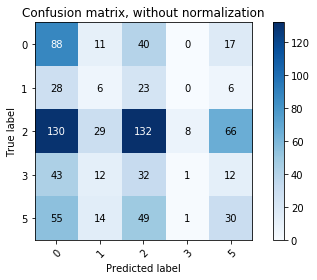

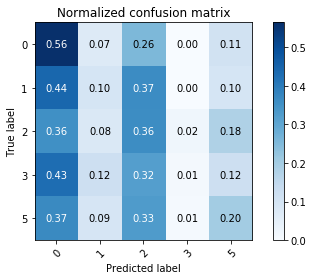

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names = [0,1,2,3,5]
class_names = np.array(class_names)
class_names = class_names.astype(int)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

## KNN ALGORITHM
A KNN algorithm was run on the dataset. The number of nearest neighbours was determined again by cross-validation and optimum value of neighbours was used to finally classify the dataset. Plots of accruacy across number of neighbours is shown below along with the accuracy, confusion matrix and classification metrics are shown below:

max accuracy during training = 0.5274068395738144
Accuracy on the test dataset: 0.517406962785114
[[ 85   0  63   5   3]
 [  5   3  52   1   2]
 [ 35   2 309  12   7]
 [ 16   1  61  16   6]
 [  7   0 117   7  18]]
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       156
           1       0.50      0.05      0.09        63
           2       0.51      0.85      0.64       365
           3       0.39      0.16      0.23       100
           4       0.50      0.12      0.19       149

   micro avg       0.52      0.52      0.52       833
   macro avg       0.50      0.34      0.34       833
weighted avg       0.51      0.52      0.45       833

Confusion matrix, without normalization
[[ 85   0  63   5   3]
 [  5   3  52   1   2]
 [ 35   2 309  12   7]
 [ 16   1  61  16   6]
 [  7   0 117   7  18]]
Normalized confusion matrix
[[0.54 0.   0.4  0.03 0.02]
 [0.08 0.05 0.83 0.02 0.03]
 [0.1  0.01 0.85 0.03 0.02]
 [0.16 0.01 0.61 0.16 0.06]
 

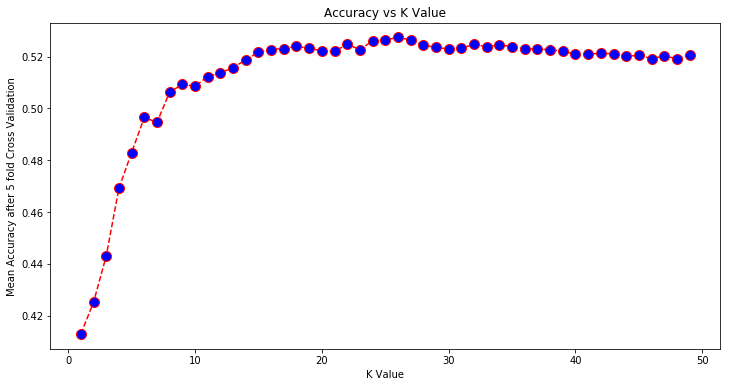

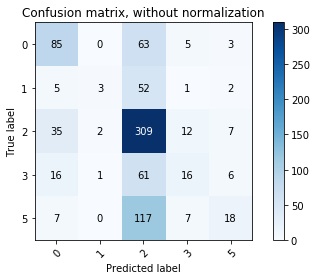

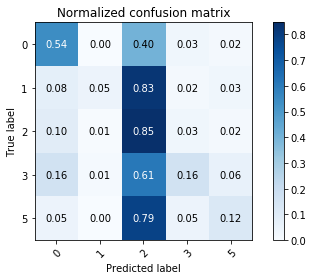

In [22]:
feat, labels = load_dataset()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
acc = []
# Calculating error for K values between 1 and 40
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(x_train, y_train)
    #pred_i = knn.predict(x_test)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    acc.append(np.mean(scores))
    #print("err=", np.mean(pred_i != y_test))
    #print("Accuracy:",metrics.accuracy_score(pred_i, y_pred))
    #print(metrics.confusion_matrix(y_test, pred_i))  
    #print(metrics.classification_report(y_test, pred_i))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), acc, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
print("max accuracy during training =",max(acc))
k=np.argmax(acc)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy on the test dataset:",metrics.accuracy_score(y_pred, y_test))
print(metrics.confusion_matrix(y_test, y_pred))  
print(metrics.classification_report(y_test, y_pred))
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')